<a href="https://colab.research.google.com/github/GuiMunizPB/MoneyCblol/blob/main/MoneyCblol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color ="#00b8ff"> "Montando um Time de Sucesso no Campeonato Brasileiro de League of Legends: Estratégias do 'Moneyball' do Esporte Eletrônico".   </font>


  Moneyball é um filme de drama esportivo baseado em fatos reais, dirigido por Bennett Miller e lançado em 2011. O filme conta a história de Billy Beane, gerente geral do time de beisebol Oakland Athletics, que enfrenta dificuldades.

   Beane decide adotar uma nova abordagem para selecionar jogadores, utilizando **estatísticas e análise de dados** para formar uma equipe competitiva com um orçamento limitado. Ele contrata Peter Brand, um jovem economista formado em Yale, para ajudá-lo nessa missão.

   A dependência de Beane em estatísticas teoricamente relevantes e em uma abordagem científica ao beisebol permitiu que ele alcançasse temporadas vitoriosas apesar de ser sobrecarregado por graves restrições orçamentárias(Cullen, Myer, & Latessa, 2009, tradução nossa).




Hipotése: Será possível utilizar a premissa de analisar os dados e estatísticas no esporte eletrônico, assim como no filme, para formar um time competitivo e custo-benefício para jogar o CBLOL (Campeonato Brasileiro de League of Legends)?

LoL, frequentemente referido como League, é um jogo de computador com batalhas de cinco contra cinco, que se assemelha ao jogo de captura de bandeira. As duas equipes começam em suas respectivas bases nos cantos opostos do mapa, inferior esquerdo e superior direito, em um ambiente parecido com uma selva, com três rotas principais conectando as duas bases: topo, meio e bot. O nexus de cada equipe está localizado perto da base, com duas torres protegendo-o. Além disso, há três outras torres em cada metade do mapa ao longo de cada rota, bem como um inibidor por equipe para cada rota. Você não pode atacar o nexus inimigo, a menos que pelo menos um dos inibidores do inimigo esteja destruído, e você não pode atacar um inibidor, a menos que todas as torres que levam a ele tenham sido destruídas. As torres, uma vez destruídas, nunca reaparecem, mas os inibidores reaparecem. A primeira equipe a destruir o nexus do inimigo ganha o jogo (Maymin, 2020, tradução nossa).

Existem métricas que podem viabilizar uma conquista mais acessível da vitória no jogo, tais como vantagens monetárias em ouro (que permitem adquirir itens), maiores percentuais no dano e uma superioridade no placar de visão. Em consonância com a perspectiva adotada nos esportes convencionais, a coleta, análise e implementação de todos esses tipos de informações estão sinalizando um ponto de inflexão na forma como os jogos competitivos online são jogados e concebidos. Em um presente cada vez mais marcado pela popularidade dos e-sports, as análises de dados aplicadas aos jogos eletrônicos têm se tornado ainda mais usuais.

O universo dos esportes eletrônicos possui um cenário muito forte no jogo League of Legends (LoL), que se destaca em várias regiões do mundo. A Riot Games criou um circuito bem organizado com campeonatos regionais e globais, formando um ecossistema eficiente que cativa um número crescente de admiradores. Visto que esse cenário é bastante aquecido no Brasil, e o campeonato brasileiro gira em torno de altas cifras, uma maior análise de dados pode retornar ferramentas poderosas para as organizações.

Para realizar minha pesquisa, utilizei como fonte o site gol.gg, uma ferramenta que existe desde 2014 e fornece estatísticas sobre a cena competitiva de League of Legends em diversas regiões, incluindo o CBLOL e eventos internacionais. Semanalmente, os dados sobre os jogos disputados são compilados e disponibilizados no site para análise.

Além disso, utilizei a classificação dos jogadores brasileiros fornecida pelos criadores de conteúdo do programa "Ilha das Lendas". Esse programa é formado por cinco ex-jogadores profissionais que fazem análises de desempenho individuais de todos os jogadores durante os jogos do campeonato. Essas informações ajudaram a formar o dataset da pesquisa.

Com base nesses dados, irei realizar regressões e tratamento de dados com o objetivo de procurar talentos em outras regiões e na liga Academy do CBLOL, que é formada por promessas. A ideia é formar uma equipe forte e competitiva, identificando jogadores com boas estatísticas, mas que ainda não são muito conhecidos no cenário de e-sports, inspirado no que acontece no Moneyball.

# <font color ="#00b8ff"> Importação dos Dados   </font>

In [ ]:
#importando as libraries do projeto
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

import numpy as np
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/GuiMunizPB/Cblol-Players-Stats/main/cblolStats.csv")
df.head()

,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,...,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15,FB %,FB Victim,Rating
0,Boal,BR,TOP,18,61.1%,4.3,2.6,1.8,5.1,8.0,...,1.20,0.33,0.24,0.19,-90,-4,234,11.1%,0%,85
1,Guigo,BR,TOP,18,27.8%,2.1,3.8,4.1,4.7,7.7,...,1.16,0.35,0.20,0.23,59,-4,-10,16.7%,5.6%,83
2,HiRit,KR,TOP,18,66.7%,2.6,3.2,3.0,4.4,8.5,...,1.04,0.31,0.17,0.20,-84,6,-148,16.7%,33.3%,81
3,Kiari,BR,TOP,18,27.8%,2.2,2.6,2.7,3.3,7.9,...,1.16,0.31,0.23,0.16,19,-2,-48,5.6%,5.6%,72
4,Lonely,KR,TOP,18,38.9%,3.2,3.6,2.8,5.4,8.3,...,1.29,0.37,0.22,0.19,152,5,-10,22.2%,5.6%,81


# <font color ="#00b8ff"> Parte 1- Introdução do Dataset  </font>

## <font color ="#00b8ff">Significado das Colunas   </font>

* Player: o nome do jogador.
* Country: o país em que o jogador reside ou representa.
* Position: a posição em que o jogador joga no jogo, como Top, Jungle, Mid, ADC ou Support.
* Games: o número total de jogos disputados pelo jogador.
* Win rate: a porcentagem de jogos ganhos pelo jogador.
* KDA: a relação entre o número total de kills, deaths e assists do jogador em todos os jogos disputados. É uma medida geral de efetividade no jogo.
* Avg kills: a média de kills por jogo do jogador.
* Avg deaths: a média de deaths por jogo do jogador.
* Avg assists: a média de assists por jogo do jogador.
* CSM: o número médio de creep score (pontos de abate de minions) por minuto.
* GPM: o número médio de gold (moeda do jogo) ganho por minuto.
* KP%: a porcentagem média de participação do jogador nas kills da equipe.
* DMG%: a porcentagem média de dano causado pelo jogador em relação ao dano total da equipe.
* DPM: o número médio de dano causado por minuto pelo jogador.
* VSPM: o número médio de visão (warding score) estabelecido pelo jogador por minuto.
* Avg WPM: a média de wards (objetos que fornecem visão no jogo) estabelecidos por minuto pelo jogador.
* Avg WCPM: a média de pink wards (wards invisíveis que podem ser usados para detectar outras wards) estabelecidos por minuto pelo jogador.
* Avg VWPM: a média de visão estabelecida com pink wards pelo jogador por minuto.
* GD@15: a diferença média de gold entre a equipe do jogador e a equipe adversária aos 15 minutos de jogo.
* CSD@15: a diferença média de creep score entre o jogador e o adversário aos 15 minutos de jogo.
* XPD@15: a diferença média de experiência entre o jogador e o adversário aos 15 minutos de jogo.
* FB %: a porcentagem de jogos em que o jogador consegue fazer a primeira kill (first blood).
* FB Victim: a porcentagem de jogos em que o jogador é a primeira vítima do adversário.
* Rating: uma pontuação geral para o desempenho do jogador feita por ex-jogadores profissionais, calculada a partir de diferentes fatores, não só estatísticos, mas também como tomado de decisões, jogadas que mudam o rumo da partida e liderança na comunicação in game. 

## <font color ="#00b8ff">Cabeçalho do Dataset   </font>

In [ ]:
df.head(0)

,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,...,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15,FB %,FB Victim,Rating


## <font color ="#00b8ff"> Informações Adicionais   </font>

In [ ]:
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")

Número de linhas: 58
Número de colunas: 24


In [ ]:
# Descrição de estátisticas de média, minima, mediana

df.describe()

,Games,KDA,Avg kills,Avg deaths,Avg assists,CSM,GPM,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15,Rating
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,15.482759,3.636207,2.577586,2.737931,6.458621,5.953448,348.362069,19.215517,426.431034,1.791379,0.578793,0.330172,0.296034,-9.310345,0.120690,5.396552,78.517241
std,4.516020,1.371092,1.305191,0.813877,1.988831,3.167390,71.359652,7.525694,173.635847,0.804366,0.466108,0.103627,0.131789,200.395679,4.026568,170.137709,7.874546
min,2.000000,0.600000,0.000000,1.300000,3.300000,0.600000,218.000000,6.600000,120.000000,0.880000,0.200000,0.140000,0.110000,-912.000000,-12.000000,-328.000000,61.000000
25%,13.250000,2.825000,1.600000,2.200000,4.950000,4.925000,287.000000,12.200000,267.250000,1.235000,0.310000,0.242500,0.200000,-103.750000,-3.000000,-100.750000,72.250000
50%,18.000000,3.300000,2.600000,2.650000,5.800000,7.600000,374.500000,21.350000,445.000000,1.475000,0.350000,0.325000,0.245000,-4.000000,0.000000,-11.000000,79.500000
75%,18.000000,4.300000,3.675000,3.175000,7.800000,8.450000,405.000000,25.925000,576.000000,1.952500,0.447500,0.400000,0.397500,86.250000,2.000000,91.250000,85.000000
max,18.000000,7.900000,5.700000,5.500000,11.200000,9.600000,460.000000,30.200000,755.000000,3.980000,2.240000,0.590000,0.600000,465.000000,8.000000,447.000000,92.000000


In [ ]:
# Informações por coluna :

for i in df.describe():

  print(f"Informações coluna {i}: \n\tMédia: {df[i].mean()} Mediana: {df[i].median()} Moda: {df[i].mode()[0]} Desvio Padrão: {df[i].std()}\n")

Informações coluna Games: 
	Média: 15.482758620689655 Mediana: 18.0 Moda: 18 Desvio Padrão: 4.51601974771662

Informações coluna KDA: 
	Média: 3.636206896551725 Mediana: 3.3 Moda: 3.0 Desvio Padrão: 1.37109231340615

Informações coluna Avg kills: 
	Média: 2.5775862068965516 Mediana: 2.6 Moda: 2.6 Desvio Padrão: 1.3051911338753277

Informações coluna Avg deaths: 
	Média: 2.7379310344827585 Mediana: 2.6500000000000004 Moda: 2.6 Desvio Padrão: 0.8138769220730623

Informações coluna Avg assists: 
	Média: 6.458620689655173 Mediana: 5.8 Moda: 5.4 Desvio Padrão: 1.9888314900224149

Informações coluna CSM: 
	Média: 5.953448275862068 Mediana: 7.6 Moda: 0.8 Desvio Padrão: 3.167389512175457

Informações coluna GPM: 
	Média: 348.36206896551727 Mediana: 374.5 Moda: 243 Desvio Padrão: 71.35965204163998

Informações coluna DMG%: 
	Média: 19.215517241379306 Mediana: 21.35 Moda: 8.7 Desvio Padrão: 7.525694039781266

Informações coluna DPM: 
	Média: 426.4310344827586 Mediana: 445.0 Moda: 192 Desvio Padr

# <font color ="#00b8ff">Parte 2- Filtragem de dados   </font>

## <font color ="#00b8ff">Verificação de NaNs   </font>

In [ ]:
print(f'Há valores NaN? {df.isna().values.any()}')

Há valores NaN? False


## <font color ="#00b8ff">Tratamento das Colunas  </font>

Dropando Colunas que não serão importantes.

In [ ]:
drop_columns = ['FB %', 'FB Victim']
df = df.drop(columns=drop_columns)

Convertendo os valores que são porcentagens mas identeficadas como Strings.

In [ ]:
# Define uma função para converter cada string em um float
def percent_to_float(s):
    if isinstance(s, str):
        try:
            return float(s.strip('%'))/100
        except ValueError:
            pass
    return s


# Aplica a função às colunas"
df['Win rate'] = df['Win rate'].apply(percent_to_float)
df['KP%'] = df['KP%'].apply(percent_to_float)
df['DMG%'] = df['DMG%'].apply(percent_to_float)



In [ ]:
df['VSPM'] = df['VSPM'].astype(float, errors = 'raise')
df['Avg WPM'] = df['Avg WPM'].astype(float, errors = 'raise')
df['GD@15'] = df['GD@15'].astype(float, errors = 'raise')
df['CSD@15'] = df['CSD@15'].astype(float, errors = 'raise')
df['XPD@15'] = df['XPD@15'].astype(float, errors = 'raise')


In [ ]:
df.head()

,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,...,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15,Rating
0,Boal,BR,TOP,18,0.611,4.3,2.6,1.8,5.1,8.0,...,24.4,483,1.20,0.33,0.24,0.19,-90.0,-4.0,234.0,85
1,Guigo,BR,TOP,18,0.278,2.1,3.8,4.1,4.7,7.7,...,28.6,612,1.16,0.35,0.20,0.23,59.0,-4.0,-10.0,83
2,HiRit,KR,TOP,18,0.667,2.6,3.2,3.0,4.4,8.5,...,22.5,527,1.04,0.31,0.17,0.20,-84.0,6.0,-148.0,81
3,Kiari,BR,TOP,18,0.278,2.2,2.6,2.7,3.3,7.9,...,26.2,566,1.16,0.31,0.23,0.16,19.0,-2.0,-48.0,72
4,Lonely,KR,TOP,18,0.389,3.2,3.6,2.8,5.4,8.3,...,24.8,594,1.29,0.37,0.22,0.19,152.0,5.0,-10.0,81


# <font color ="#00b8ff">Parte 3 - Estatística Descritiva e Visualização de Dados do Cblol </font>

In [ ]:
df_top = df.loc[df['Position'] == 'TOP']
df_jungle = df.loc[df['Position'] == 'JUNGLE']
df_mid = df.loc[df['Position'] == 'MID']
df_adc = df.loc[df['Position'] == 'ADC']
df_support = df.loc[df['Position'] == 'SUPPORT']


## <font color ="#00b8ff">Análise da Top Lane   </font>


In [ ]:
df_top

,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,...,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15,Rating
0,Boal,BR,TOP,18,0.611,4.3,2.6,1.8,5.1,8.0,...,24.4,483,1.20,0.33,0.24,0.19,-90.0,-4.0,234.0,85
1,Guigo,BR,TOP,18,0.278,2.1,3.8,4.1,4.7,7.7,...,28.6,612,1.16,0.35,0.20,0.23,59.0,-4.0,-10.0,83
2,HiRit,KR,TOP,18,0.667,2.6,3.2,3.0,4.4,8.5,...,22.5,527,1.04,0.31,0.17,0.20,-84.0,6.0,-148.0,81
3,Kiari,BR,TOP,18,0.278,2.2,2.6,2.7,3.3,7.9,...,26.2,566,1.16,0.31,0.23,0.16,19.0,-2.0,-48.0,72
4,Lonely,KR,TOP,18,0.389,3.2,3.6,2.8,5.4,8.3,...,24.8,594,1.29,0.37,0.22,0.19,152.0,5.0,-10.0,81
5,Robo,BR,TOP,18,0.667,2.5,3.5,3.3,4.6,8.0,...,23.8,559,1.25,0.34,0.21,0.16,-150.0,2.0,-89.0,85
6,Tay,BR,TOP,18,0.556,3.7,2.4,2.1,5.5,7.5,...,18.8,447,1.10,0.28,0.22,0.18,42.0,-4.0,173.0,81
7,Wizer,KR,TOP,18,0.667,2.9,2.6,2.6,5.1,8.3,...,21.3,456,1.33,0.33,0.22,0.22,80.0,8.0,-162.0,87
8,Zzk,KR,TOP,18,0.389,1.8,2.1,3.3,4.0,7.6,...,20.8,467,1.03,0.27,0.25,0.16,-109.0,-3.0,-89.0,68
9,fNb,BR,TOP,18,0.500,2.9,2.6,2.2,3.7,8.6,...,21.4,432,1.25,0.40,0.21,0.25,81.0,-3.0,149.0,78


In [ ]:
corr_top = df_top.corr()
print(corr_top)

             Games  Win rate       KDA  Avg kills  Avg deaths  Avg assists  \
Games          NaN       NaN       NaN        NaN         NaN          NaN   
Win rate       NaN  1.000000  0.469184  -0.101873   -0.405560     0.385193   
KDA            NaN  0.469184  1.000000  -0.144094   -0.807622     0.634639   
Avg kills      NaN -0.101873 -0.144094   1.000000    0.582466     0.256759   
Avg deaths     NaN -0.405560 -0.807622   0.582466    1.000000    -0.172407   
Avg assists    NaN  0.385193  0.634639   0.256759   -0.172407     1.000000   
CSM            NaN  0.384466  0.124424   0.213996   -0.237131    -0.140968   
GPM            NaN  0.422398  0.075216   0.580623    0.017523     0.057428   
KP%            NaN -0.131954  0.299040   0.664712    0.097917     0.500122   
DMG%           NaN -0.544667 -0.259061   0.673585    0.513103    -0.166589   
DPM            NaN -0.476353 -0.351369   0.827886    0.657192     0.001985   
VSPM           NaN  0.168825  0.295196   0.287978   -0.205200   

<ipython-input-16-519d8e26494f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_top = df_top.corr()


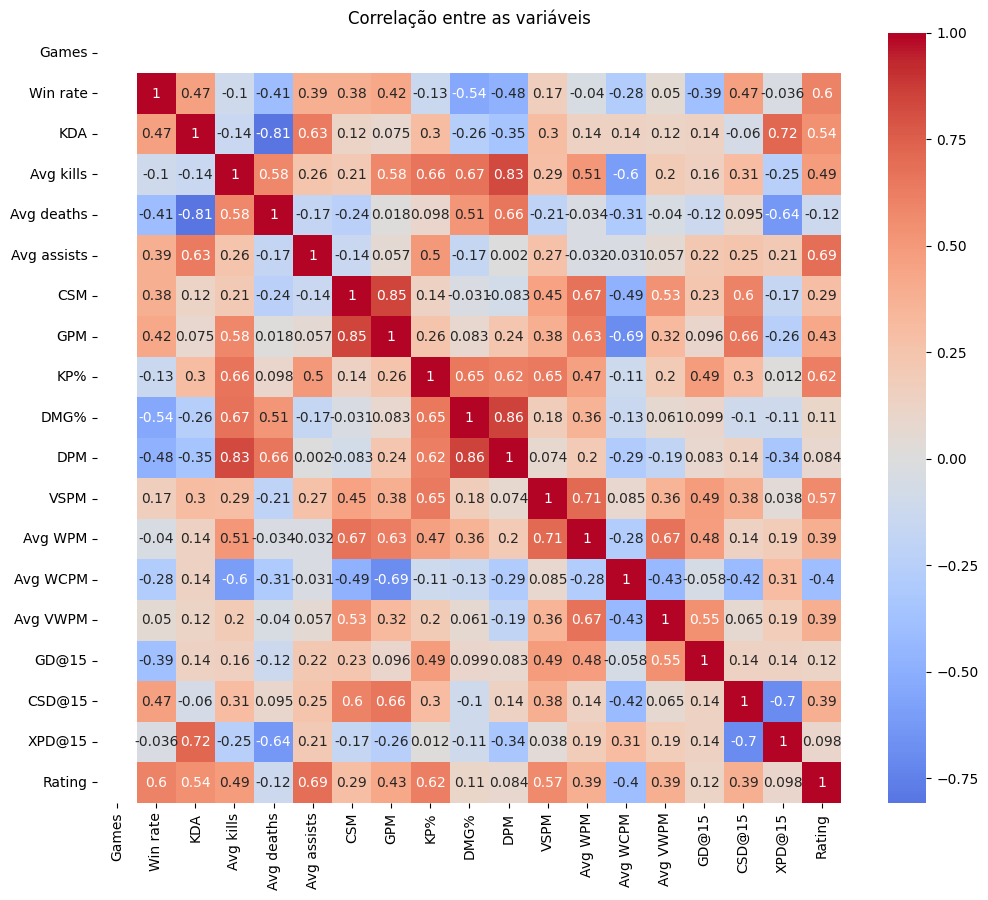

In [ ]:
# Gerar o heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_top, annot=True, cmap='coolwarm', center=0)

# Configurar o título do heatmap
plt.title('Correlação entre as variáveis')

# Mostrar o heatmap
plt.show()

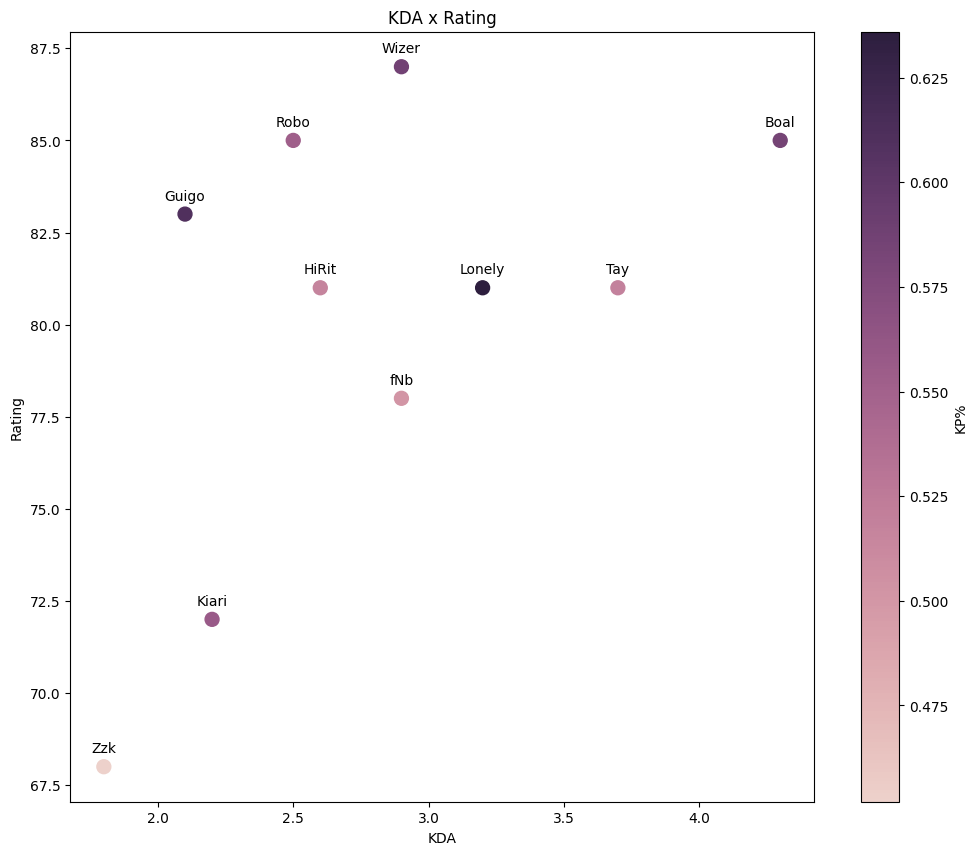

In [ ]:
# Configurar a paleta de cores
cmap = sns.cubehelix_palette(as_cmap=True)

# Criar o gráfico de dispersão
fig, ax = plt.subplots(figsize=(12, 10))
points = ax.scatter(x='KDA', y='Rating', c='KP%', cmap=cmap, data=df_top, s=100)

# Adicionar o nome do jogador em cada ponto
for i, player in enumerate(df_top['Player']):
    ax.annotate(player, (df_top['KDA'][i], df_top['Rating'][i]), fontsize=10, textcoords="offset points", xytext=(0,10), ha='center')

# Adicionar barra de cores
cbar = plt.colorbar(points)
cbar.ax.set_ylabel('KP%')

# Configurar o título e os eixos
ax.set_title('KDA x Rating')
ax.set_xlabel('KDA')
ax.set_ylabel('Rating')

plt.show()

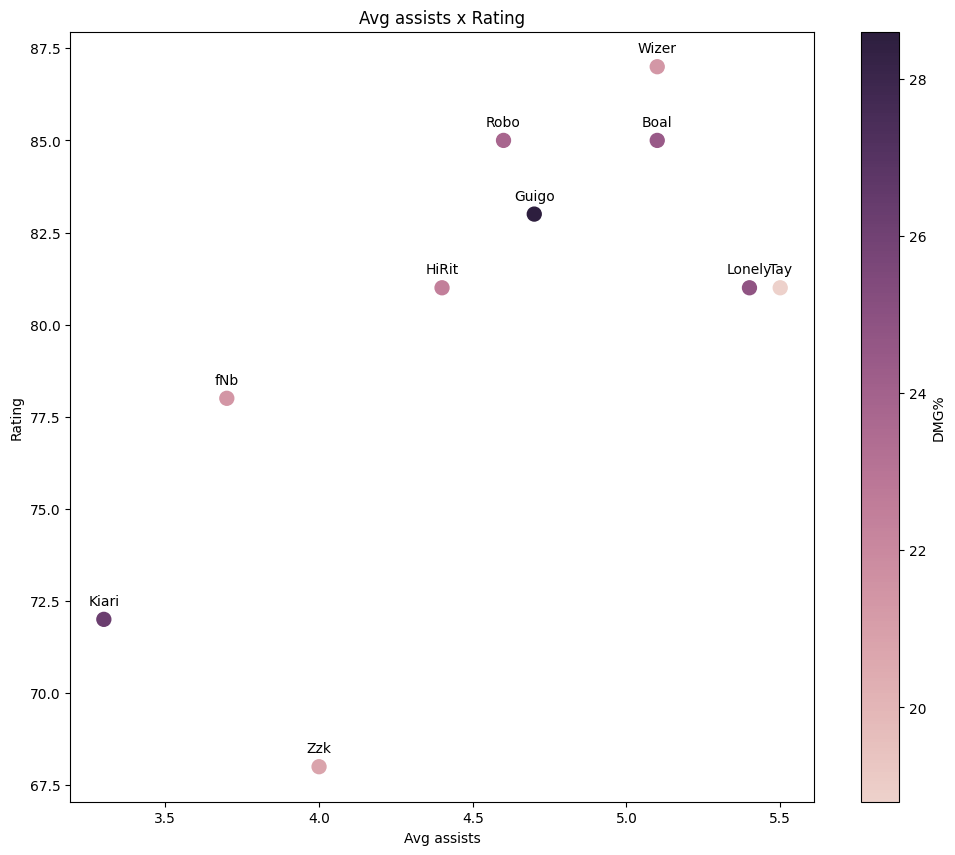

In [ ]:
# Configurar a paleta de cores
cmap = sns.cubehelix_palette(as_cmap=True)

# Criar o gráfico de dispersão
fig, ax = plt.subplots(figsize=(12, 10))
points = ax.scatter(x='Avg assists', y='Rating', c='DMG%', cmap=cmap, data=df_top, s=100)

# Adicionar o nome do jogador em cada ponto
for i, player in enumerate(df_top['Player']):
    ax.annotate(player, (df_top['Avg assists'][i], df_top['Rating'][i]), fontsize=10, textcoords="offset points", xytext=(0,10), ha='center')

# Adicionar barra de cores
cbar = plt.colorbar(points)
cbar.ax.set_ylabel('DMG%')

# Configurar o título e os eixos
ax.set_title('Avg assists x Rating')
ax.set_xlabel('Avg assists')
ax.set_ylabel('Rating')

plt.show()

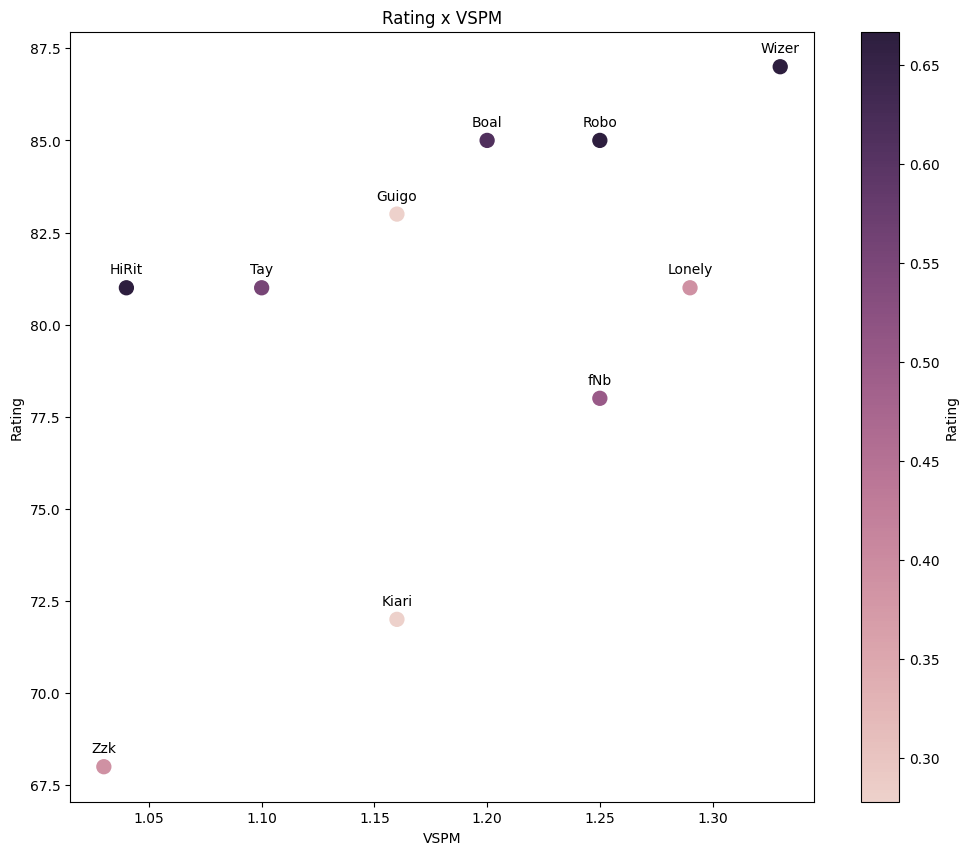

In [ ]:
# Configurar a paleta de cores
cmap = sns.cubehelix_palette(as_cmap=True)

# Criar o gráfico de dispersão
fig, ax = plt.subplots(figsize=(12, 10))
points = ax.scatter(x='VSPM', y='Rating', c='Win rate', cmap=cmap, data=df_top, s=100)

# Adicionar o nome do jogador em cada ponto
for i, player in enumerate(df_top['Player']):
    ax.annotate(player, (df_top['VSPM'][i], df_top['Rating'][i]), fontsize=10, textcoords="offset points", xytext=(0,10), ha='center')

# Adicionar barra de cores
cbar = plt.colorbar(points)
cbar.ax.set_ylabel('Rating')

# Configurar o título e os eixos
ax.set_title('Rating x VSPM')
ax.set_xlabel('VSPM')
ax.set_ylabel('Rating')

plt.show()

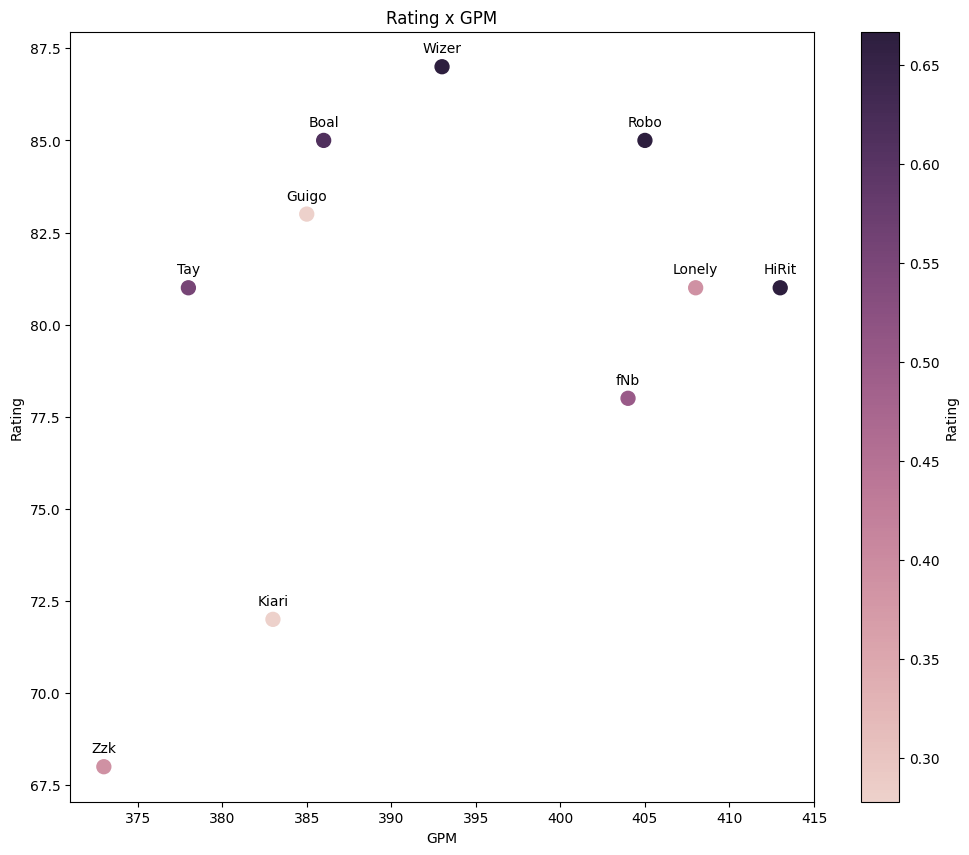

In [ ]:
# Configurar a paleta de cores
cmap = sns.cubehelix_palette(as_cmap=True)

# Criar o gráfico de dispersão
fig, ax = plt.subplots(figsize=(12, 10))
points = ax.scatter(x='GPM', y='Rating', c='Win rate', cmap=cmap, data=df_top, s=100)

# Adicionar o nome do jogador em cada ponto
for i, player in enumerate(df_top['Player']):
    ax.annotate(player, (df_top['GPM'][i], df_top['Rating'][i]), fontsize=10, textcoords="offset points", xytext=(0,10), ha='center')

# Adicionar barra de cores
cbar = plt.colorbar(points)
cbar.ax.set_ylabel('Rating')

# Configurar o título e os eixos
ax.set_title('Rating x GPM')
ax.set_xlabel('GPM')
ax.set_ylabel('Rating')

plt.show()

Com as análises dos dados podemos inferir que as melhores estatísticas para descrever a perfomance dos players da top lane foram 


*   KDA
*   KP%
*   VSPM
*   GPM

Top lane apesar de serem solo laners tem um papel fundamental na rotação do time, assim sendo bastante participativos e podendo distruibir visão ao longo do mapa. Esses dados mostram que os fatores são fundamentais.





## <font color ="#00b8ff">Análise da Jungle   </font>


In [ ]:
df_jungle = df_jungle.reset_index(drop=True)

df_jungle

,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,...,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15,Rating
0,Aegis,BR,JUNGLE,18,0.611,3.7,2.6,2.6,6.9,6.2,...,16.2,322,1.21,0.28,0.26,0.28,-2.0,4.0,33.0,88
1,Cariok,BR,JUNGLE,18,0.667,3.4,1.6,2.7,7.5,5.4,...,16.5,342,1.67,0.32,0.41,0.37,-26.0,-1.0,-54.0,85
2,Croc,KR,JUNGLE,18,0.667,3.0,2.3,3.5,8.2,5.0,...,13.2,305,1.58,0.32,0.36,0.37,-172.0,-3.0,-140.0,84
3,Disamis,BR,JUNGLE,18,0.556,3.8,3.0,2.6,6.7,5.1,...,14.3,360,1.68,0.28,0.34,0.24,78.0,-3.0,-100.0,81
4,Goot,BR,JUNGLE,18,0.500,3.1,1.7,2.9,7.4,5.0,...,15.7,332,1.50,0.30,0.35,0.33,188.0,-1.0,70.0,76
5,Grell,MEX,JUNGLE,10,0.400,3.6,4.3,3.5,8.2,6.1,...,19.1,440,1.67,0.20,0.37,0.31,465.0,6.0,370.0,87
6,Hugato,BR,JUNGLE,6,0.167,2.6,1.8,2.8,5.7,5.0,...,12.1,241,2.03,0.39,0.56,0.39,28.0,-4.0,-212.0,69
7,Ranger,BR,JUNGLE,18,0.667,2.9,1.7,3.1,7.4,5.6,...,13.5,327,1.58,0.27,0.31,0.29,-285.0,2.0,-85.0,86
8,Sting,BR,JUNGLE,2,0.000,0.6,0.0,5.5,3.5,5.2,...,9.5,213,1.60,0.32,0.40,0.30,-912.0,8.0,404.0,61
9,Yampi,BR,JUNGLE,18,0.389,2.9,2.7,3.2,6.8,5.6,...,17.3,379,1.65,0.28,0.35,0.30,52.0,4.0,23.0,75


<ipython-input-23-0a2156da7507>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_jungle = df_jungle.corr()


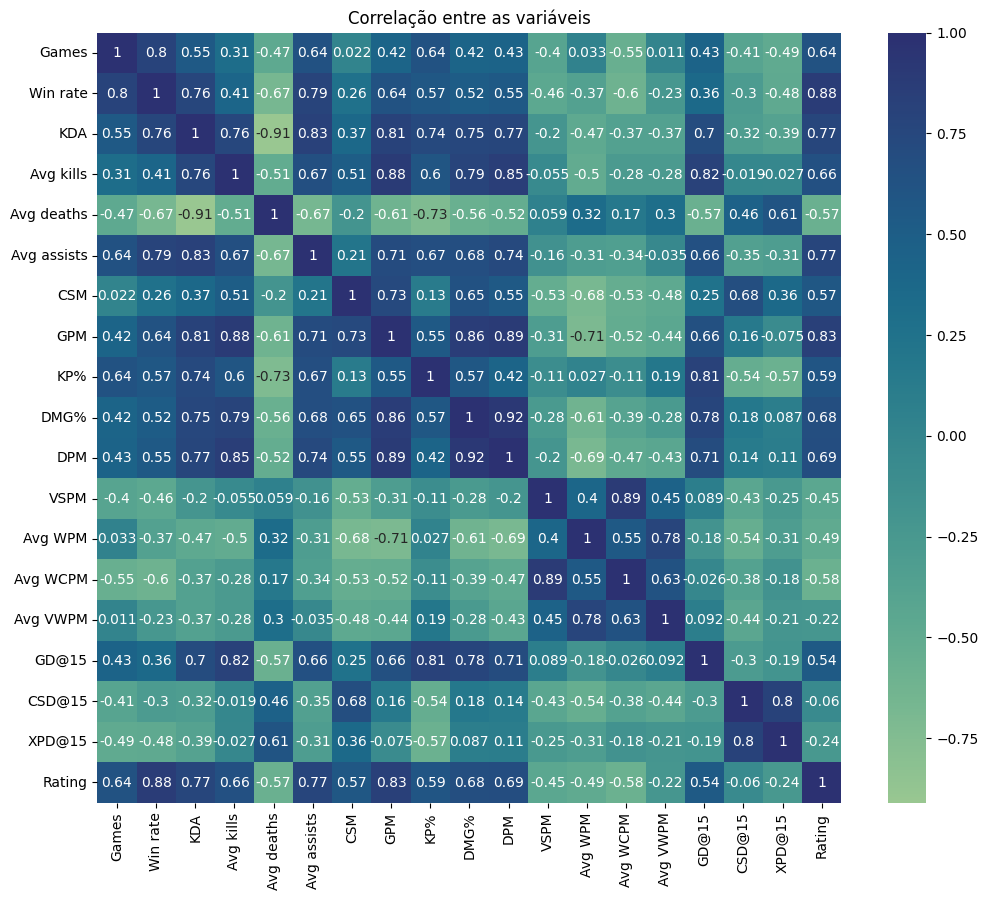

In [ ]:
corr_jungle = df_jungle.corr()

# Gerar o heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_jungle, annot=True, cmap = sns.color_palette("crest", as_cmap=True), center=0)

# Configurar o título do heatmap
plt.title('Correlação entre as variáveis')

# Mostrar o heatmap
plt.show()

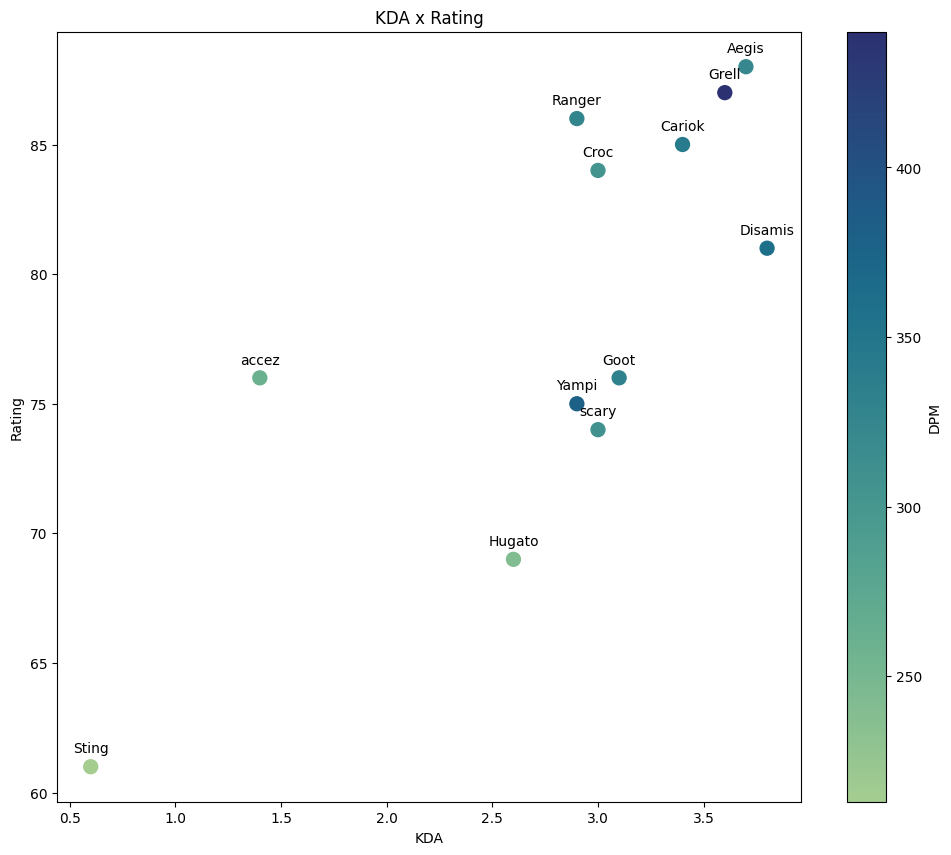

In [ ]:
# Configurar a paleta de cores
cmap = sns.color_palette("crest", as_cmap=True)

# Criar o gráfico de dispersão
fig, ax = plt.subplots(figsize=(12, 10))
points = ax.scatter(x='KDA', y='Rating', c='DPM', cmap=cmap, data=df_jungle, s=100)

# Adicionar o nome do jogador em cada ponto
for i, player in enumerate(df_jungle['Player']):
    ax.annotate(player, (df_jungle['KDA'][i], df_jungle['Rating'][i]), fontsize=10, textcoords="offset points", xytext=(0,10), ha='center')

# Adicionar barra de cores
cbar = plt.colorbar(points)
cbar.ax.set_ylabel('DPM')

# Configurar o título e os eixos
ax.set_title('KDA x Rating')
ax.set_xlabel('KDA')
ax.set_ylabel('Rating')

plt.show()

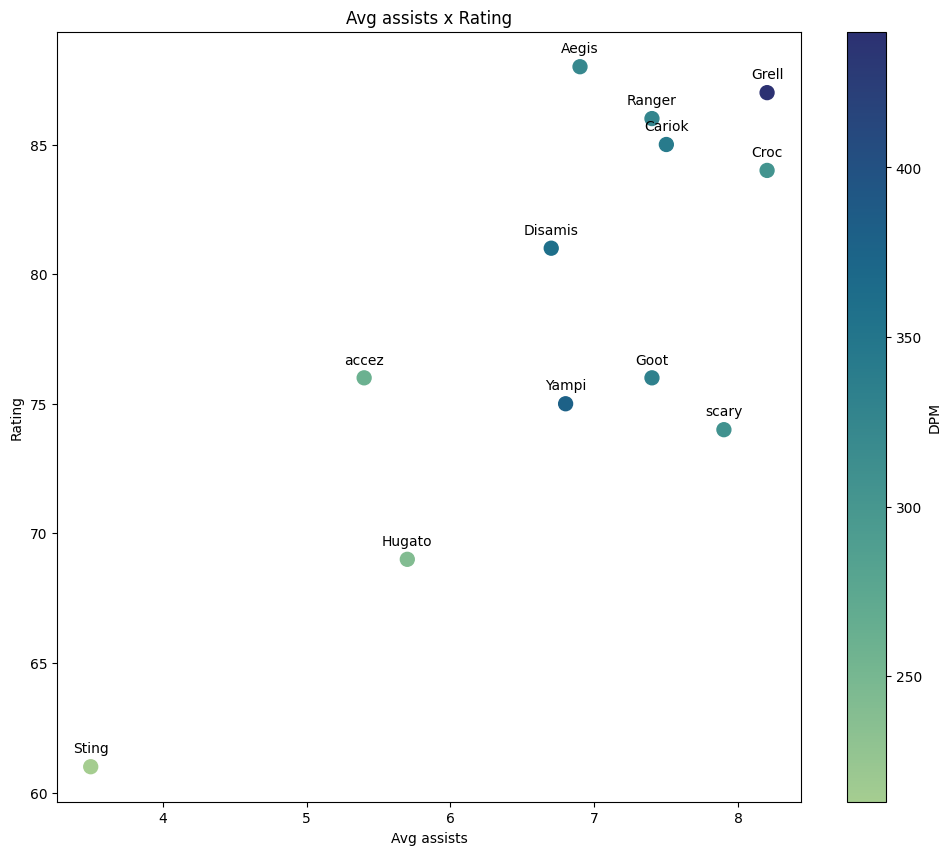

In [ ]:
# Configurar a paleta de cores
cmap = sns.color_palette("crest", as_cmap=True)

# Criar o gráfico de dispersão
fig, ax = plt.subplots(figsize=(12, 10))
points = ax.scatter(x='Avg assists', y='Rating', c='DPM', cmap=cmap, data=df_jungle, s=100)

# Adicionar o nome do jogador em cada ponto
for i, player in enumerate(df_jungle['Player']):
    ax.annotate(player, (df_jungle['Avg assists'][i], df_jungle['Rating'][i]), fontsize=10, textcoords="offset points", xytext=(0,10), ha='center')

# Adicionar barra de cores
cbar = plt.colorbar(points)
cbar.ax.set_ylabel('DPM')

# Configurar o título e os eixos
ax.set_title('Avg assists x Rating')
ax.set_xlabel('Avg assists')
ax.set_ylabel('Rating')

plt.show()

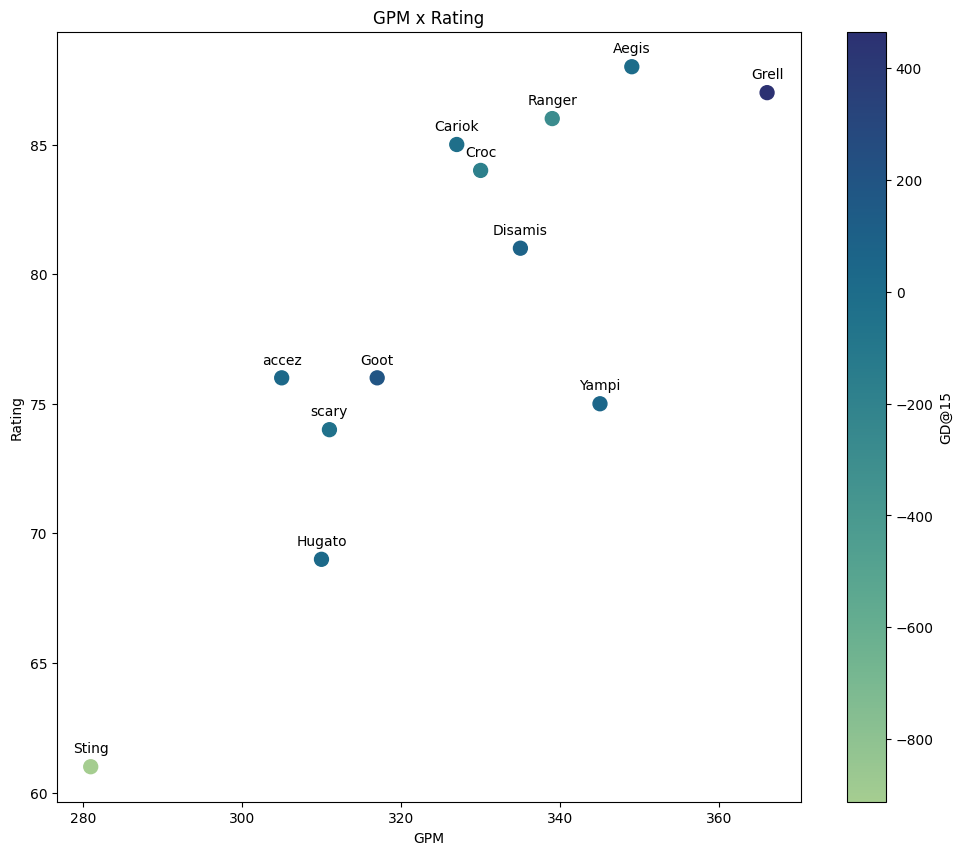

In [ ]:
# Configurar a paleta de cores
cmap = sns.color_palette("crest", as_cmap=True)

# Criar o gráfico de dispersão
fig, ax = plt.subplots(figsize=(12, 10))
points = ax.scatter(x='GPM', y='Rating', c='GD@15', cmap=cmap, data=df_jungle, s=100)

# Adicionar o nome do jogador em cada ponto
for i, player in enumerate(df_jungle['Player']):
    ax.annotate(player, (df_jungle['GPM'][i], df_jungle['Rating'][i]), fontsize=10, textcoords="offset points", xytext=(0,10), ha='center')

# Adicionar barra de cores
cbar = plt.colorbar(points)
cbar.ax.set_ylabel('GD@15')

# Configurar o título e os eixos
ax.set_title('GPM x Rating')
ax.set_xlabel('GPM')
ax.set_ylabel('Rating')

plt.show()

Com as análises dos dados podemos inferir que as melhores estatísticas para descrever a perfomance dos players da Jungle foram 


*   KDA
*   DPM
*   CSM
*   GPM


Jungles movimentam o jogo e aqueles que conseguem pegar mais recursos cada minuto a frente do Jungle adversário conseguem dar um gap maior de perfomance.







## <font color ="#00b8ff">Análise da Mid Lane   </font>


In [ ]:
df_mid = df_mid.reset_index(drop=True)

df_mid

,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,...,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15,Rating
0,Avenger,BR,MID,18,0.611,3.7,3.3,2.5,5.9,7.7,...,22.2,443,1.12,0.33,0.23,0.20,-44.0,-3.0,-157.0,73
1,Envy,BR,MID,18,0.500,3.8,3.7,2.3,4.9,8.3,...,28.7,573,1.37,0.31,0.29,0.24,304.0,0.0,37.0,81
2,Grevthar,BR,MID,18,0.278,3.2,3.2,3.0,6.3,7.6,...,21.4,462,1.15,0.34,0.18,0.25,-99.0,0.0,-14.0,78
3,Hauz,BR,MID,18,0.556,4.3,3.9,2.4,6.4,8.1,...,30.1,755,1.23,0.33,0.24,0.17,139.0,2.0,92.0,87
4,Lava,KR,MID,18,0.667,3.6,3.1,2.7,6.6,8.6,...,28.1,650,1.29,0.25,0.32,0.15,-100.0,7.0,58.0,77
5,NOsFerus,BR,MID,18,0.389,3.7,3.8,2.6,5.8,7.5,...,23.4,532,0.88,0.25,0.17,0.15,-117.0,-4.0,-48.0,75
6,Piloto,BR,MID,18,0.278,2.8,2.4,2.5,4.5,8.0,...,23.2,501,1.06,0.34,0.14,0.24,-89.0,-6.0,-21.0,61
7,Tinowns,BR,MID,18,0.667,5.1,3.1,1.9,6.7,8.3,...,26.4,628,1.40,0.44,0.23,0.27,21.0,1.0,-64.0,90
8,Yuri,KR,MID,18,0.389,2.8,3.7,3.2,5.4,8.0,...,25.7,600,1.27,0.26,0.28,0.18,19.0,1.0,-113.0,70
9,dyNquedo,BR,MID,18,0.667,5.5,3.5,1.6,5.4,8.2,...,25.5,537,1.23,0.35,0.27,0.28,-35.0,2.0,228.0,92


<ipython-input-28-cb33a1d809da>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mid = df_mid.corr()


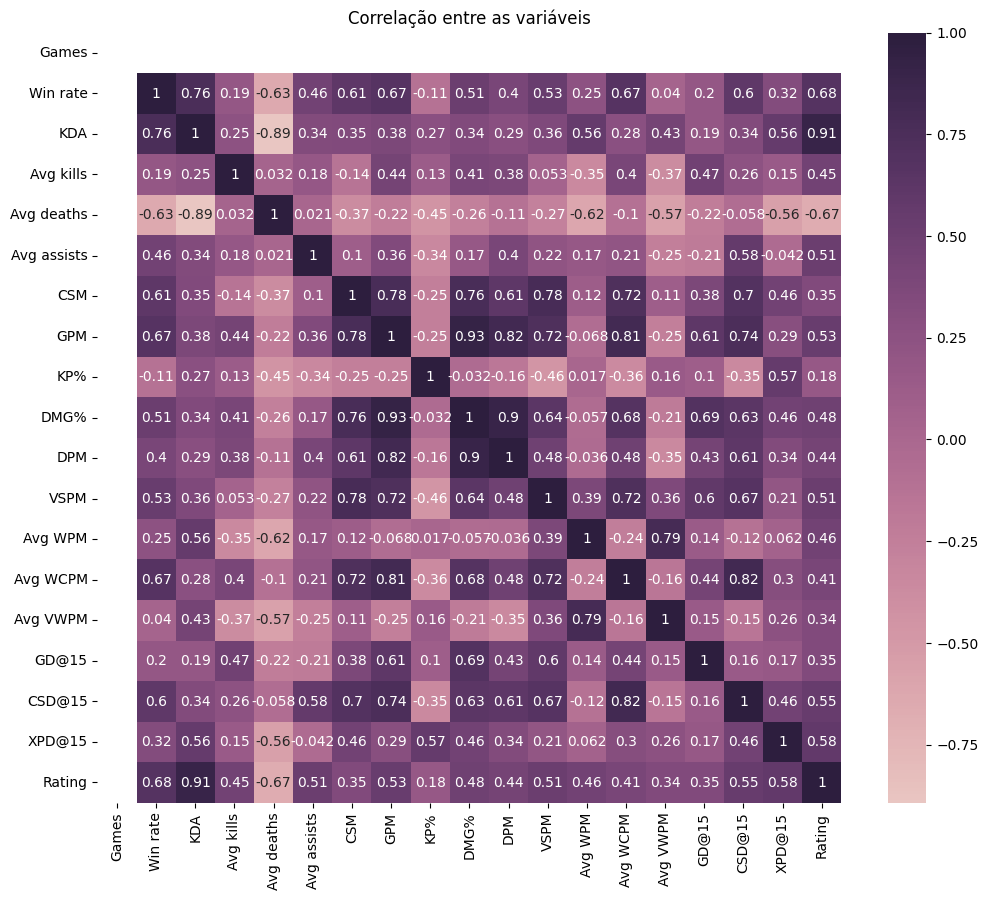

In [ ]:
corr_mid = df_mid.corr()

# Gerar o heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_mid, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), center=0)

# Configurar o título do heatmap
plt.title('Correlação entre as variáveis')

# Mostrar o heatmap
plt.show()

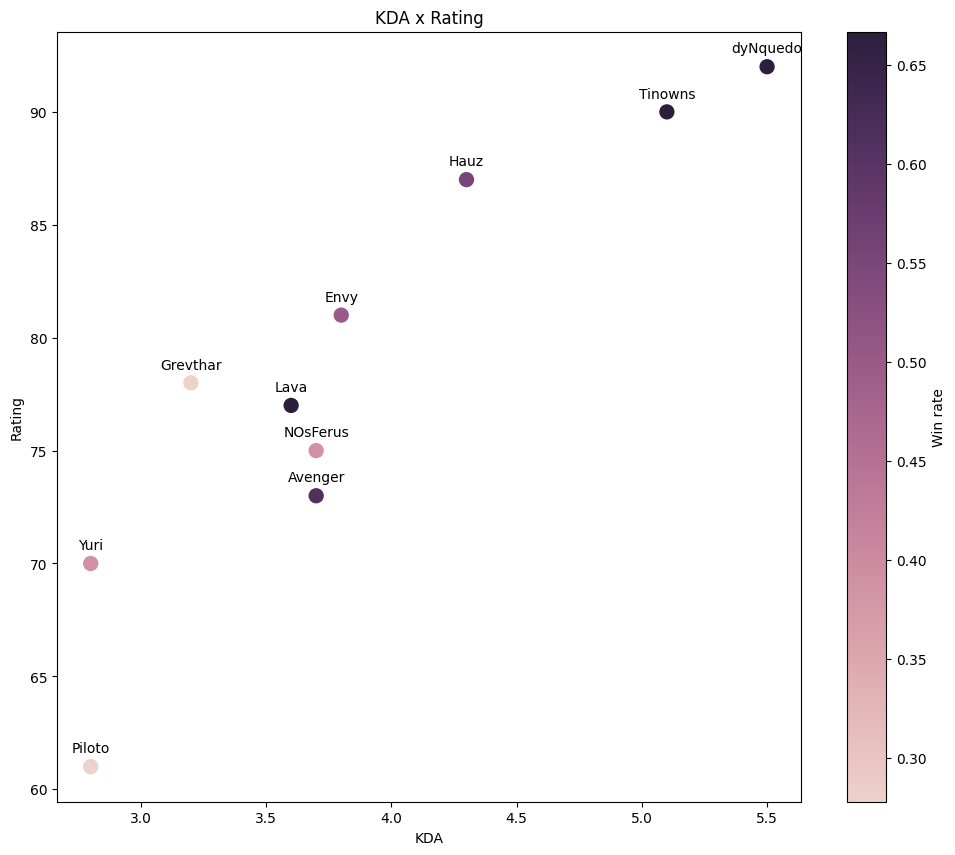

In [ ]:
# Configurar a paleta de cores
cmap=sns.cubehelix_palette(as_cmap=True)

# Criar o gráfico de dispersão
fig, ax = plt.subplots(figsize=(12, 10))
points = ax.scatter(x='KDA', y='Rating', c='Win rate', cmap=cmap, data=df_mid, s=100)

# Adicionar o nome do jogador em cada ponto
for i, player in enumerate(df_mid['Player']):
    ax.annotate(player, (df_mid['KDA'][i], df_mid['Rating'][i]), fontsize=10, textcoords="offset points", xytext=(0,10), ha='center')

# Adicionar barra de cores
cbar = plt.colorbar(points)
cbar.ax.set_ylabel('Win rate')

# Configurar o título e os eixos
ax.set_title('KDA x Rating')
ax.set_xlabel('KDA')
ax.set_ylabel('Rating')

plt.show()

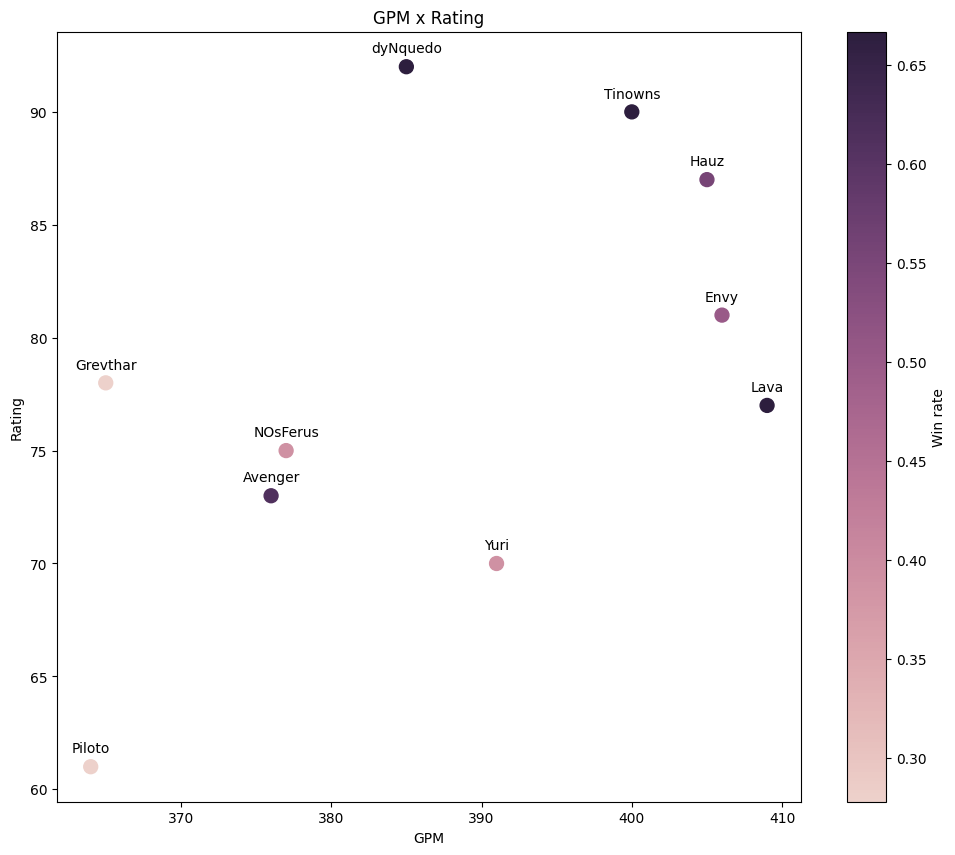

In [ ]:
# Configurar a paleta de cores
cmap=sns.cubehelix_palette(as_cmap=True)

# Criar o gráfico de dispersão
fig, ax = plt.subplots(figsize=(12, 10))
points = ax.scatter(x='GPM', y='Rating', c='Win rate', cmap=cmap, data=df_mid, s=100)

# Adicionar o nome do jogador em cada ponto
for i, player in enumerate(df_mid['Player']):
    ax.annotate(player, (df_mid['GPM'][i], df_mid['Rating'][i]), fontsize=10, textcoords="offset points", xytext=(0,10), ha='center')

# Adicionar barra de cores
cbar = plt.colorbar(points)
cbar.ax.set_ylabel('Win rate')

# Configurar o título e os eixos
ax.set_title('GPM x Rating')
ax.set_xlabel('GPM')
ax.set_ylabel('Rating')

plt.show()

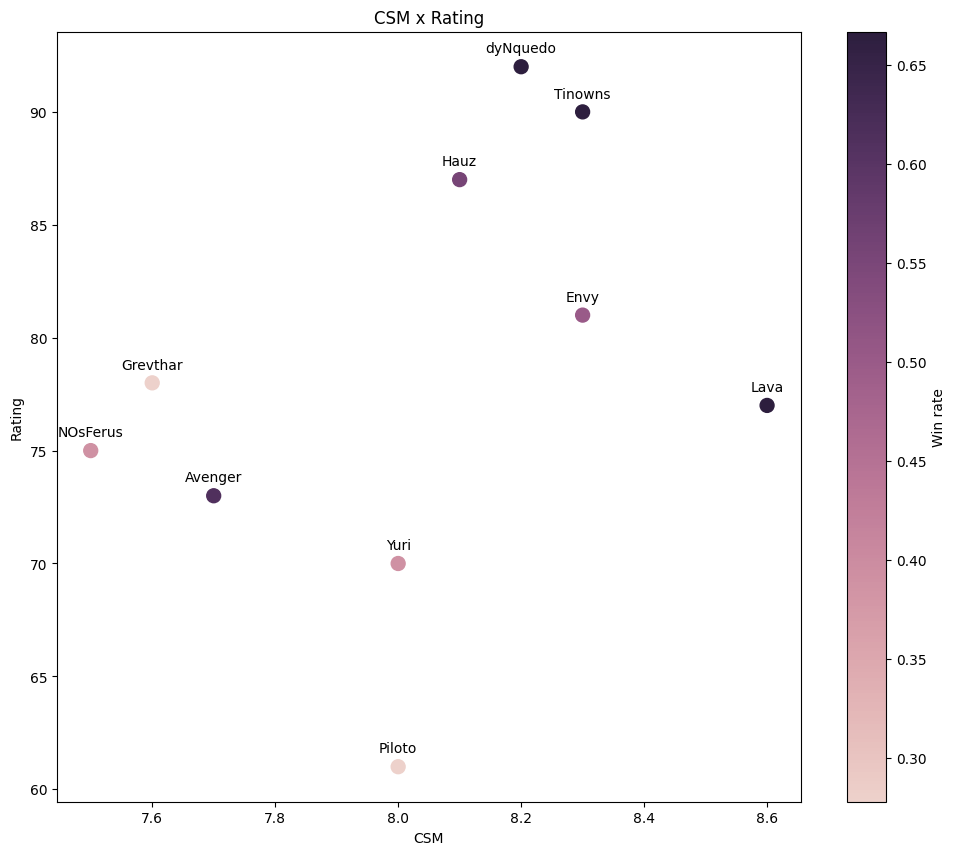

In [ ]:
# Configurar a paleta de cores
cmap=sns.cubehelix_palette(as_cmap=True)

# Criar o gráfico de dispersão
fig, ax = plt.subplots(figsize=(12, 10))
points = ax.scatter(x='CSM', y='Rating', c='Win rate', cmap=cmap, data=df_mid, s=100)

# Adicionar o nome do jogador em cada ponto
for i, player in enumerate(df_mid['Player']):
    ax.annotate(player, (df_mid['CSM'][i], df_mid['Rating'][i]), fontsize=10, textcoords="offset points", xytext=(0,10), ha='center')

# Adicionar barra de cores
cbar = plt.colorbar(points)
cbar.ax.set_ylabel('Win rate')

# Configurar o título e os eixos
ax.set_title('CSM x Rating')
ax.set_xlabel('CSM')
ax.set_ylabel('Rating')

plt.show()

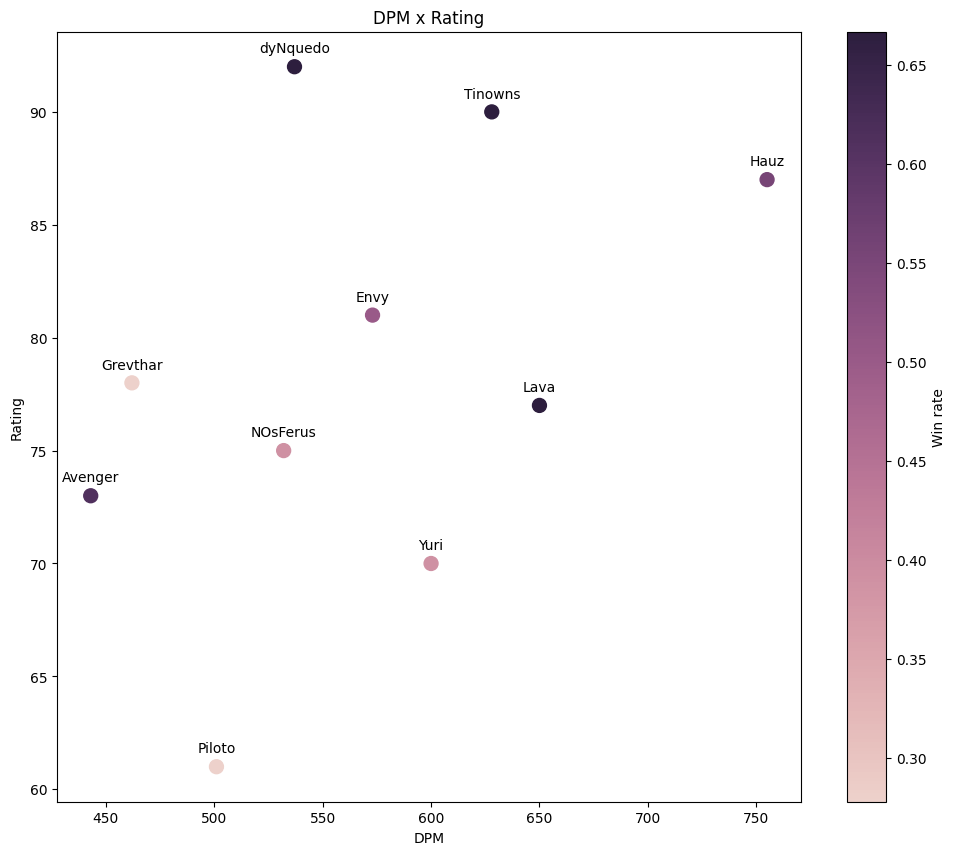

In [ ]:
# Configurar a paleta de cores
cmap=sns.cubehelix_palette(as_cmap=True)

# Criar o gráfico de dispersão
fig, ax = plt.subplots(figsize=(12, 10))
points = ax.scatter(x='DPM', y='Rating', c='Win rate', cmap=cmap, data=df_mid, s=100)

# Adicionar o nome do jogador em cada ponto
for i, player in enumerate(df_mid['Player']):
    ax.annotate(player, (df_mid['DPM'][i], df_mid['Rating'][i]), fontsize=10, textcoords="offset points", xytext=(0,10), ha='center')

# Adicionar barra de cores
cbar = plt.colorbar(points)
cbar.ax.set_ylabel('Win rate')

# Configurar o título e os eixos
ax.set_title('DPM x Rating')
ax.set_xlabel('DPM')
ax.set_ylabel('Rating')

plt.show()

Com as análises dos dados podemos inferir que as melhores estatísticas para descrever a perfomance dos players da Mid lane foram 


*   KDA
*   DPM
*   CSM
*   GPM


Mid lanes priorizam melhores perfomances individuais, por estarem em uma solo lane e por terem papel de carregadores, vantagens nessas estatísticas fazem sentido como diferencial.




## <font color ="#00b8ff">Análise dos Adc   </font>


In [ ]:
df_adc = df_adc.reset_index(drop=True)

df_adc

,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,...,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15,Rating
0,Brance,BR,ADC,18,0.556,4.6,4.3,2.2,5.7,8.8,...,26.0,663,1.45,0.39,0.37,0.23,-5.0,-3.0,95.0,83
1,Bvoy,KR,ADC,18,0.667,6.9,4.7,1.4,4.8,9.5,...,29.1,613,1.63,0.40,0.39,0.20,207.0,5.0,244.0,90
2,DudsTheBoy,BR,ADC,12,0.417,3.0,4.5,3.3,5.4,9.3,...,27.9,716,1.37,0.29,0.40,0.22,-14.0,-2.0,-282.0,75
3,Juliera,BR,ADC,18,0.278,2.3,2.8,2.9,4.1,9.0,...,27.3,577,1.62,0.35,0.32,0.11,-304.0,-4.0,-44.0,70
4,Netuno,BR,ADC,18,0.667,5.5,5.7,1.9,5.1,9.2,...,27.9,656,1.31,0.29,0.41,0.11,261.0,5.0,-228.0,91
5,NinjaKiwi,BR,ADC,18,0.389,2.7,4.2,3.7,5.6,8.5,...,28.4,638,1.52,0.35,0.38,0.21,-163.0,0.0,-79.0,78
6,RAV3N,BR,ADC,6,0.333,3.2,3.7,2.7,4.8,9.2,...,22.0,478,1.16,0.40,0.28,0.15,-410.0,-12.0,-125.0,71
7,Route,KR,ADC,18,0.667,5.0,4.1,2.2,6.9,9.0,...,28.1,687,1.37,0.37,0.31,0.21,130.0,2.0,146.0,87
8,ST3PZ,BR,ADC,12,0.333,3.0,3.9,2.9,4.8,8.5,...,23.5,533,1.27,0.27,0.31,0.22,-8.0,-3.0,-328.0,68
9,Titan,BR,ADC,18,0.611,5.7,4.2,1.7,5.4,9.6,...,29.4,592,1.70,0.42,0.50,0.23,-117.0,1.0,105.0,89


<ipython-input-34-bde25b7af941>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_adc = df_adc.corr()


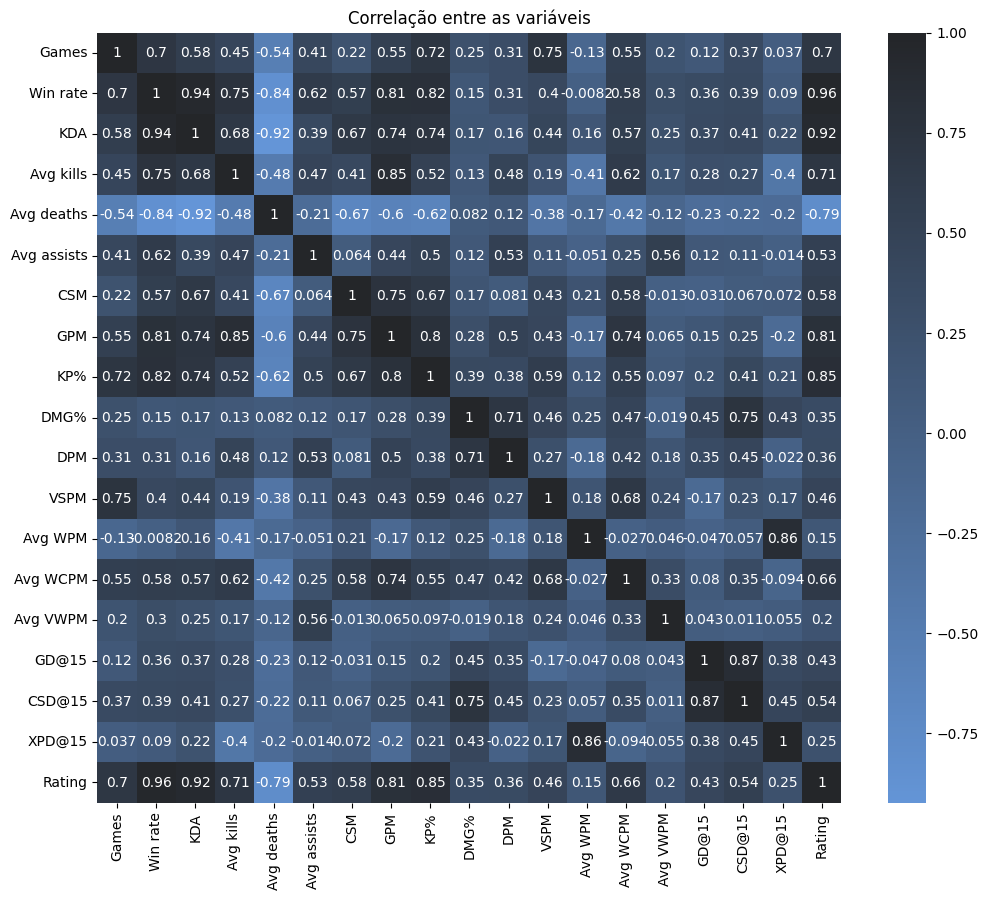

In [ ]:
corr_adc = df_adc.corr()

# Gerar o heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_adc, annot=True, cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True), center=0)

# Configurar o título do heatmap
plt.title('Correlação entre as variáveis')

# Mostrar o heatmap
plt.show()

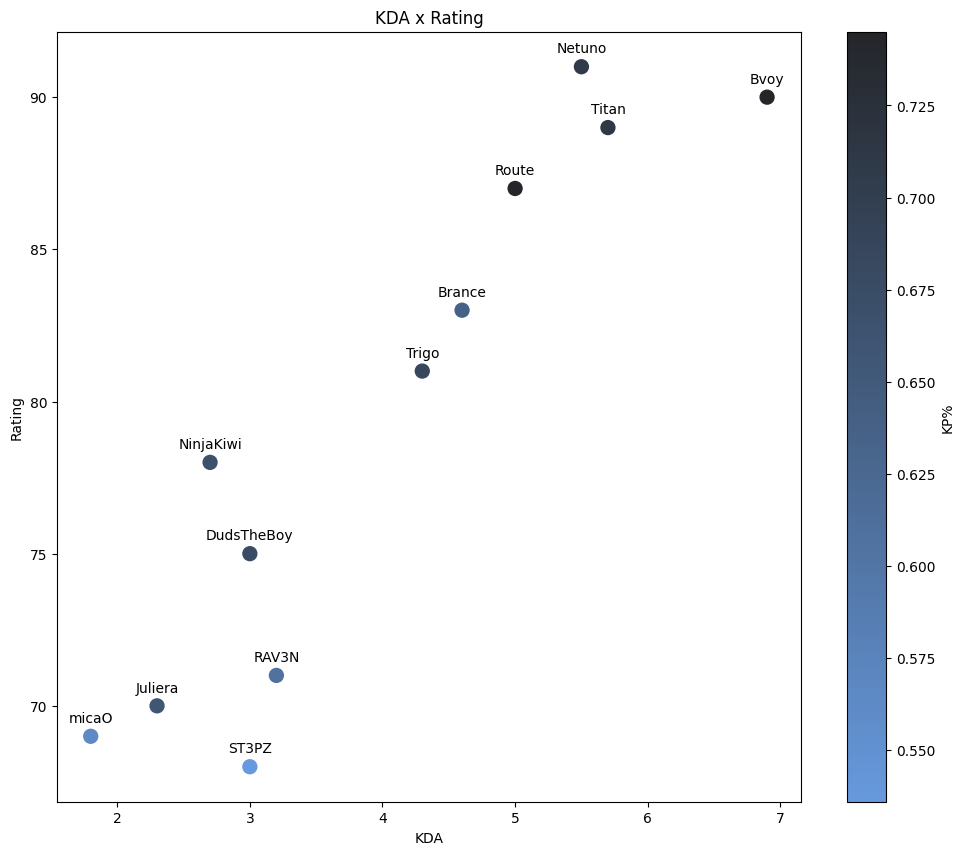

In [ ]:
# Configurar a paleta de cores
cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True)

# Criar o gráfico de dispersão
fig, ax = plt.subplots(figsize=(12, 10))
points = ax.scatter(x='KDA', y='Rating', c='KP%', cmap=cmap, data=df_adc, s=100)

# Adicionar o nome do jogador em cada ponto
for i, player in enumerate(df_adc['Player']):
    ax.annotate(player, (df_adc['KDA'][i], df_adc['Rating'][i]), fontsize=10, textcoords="offset points", xytext=(0,10), ha='center')

# Adicionar barra de cores
cbar = plt.colorbar(points)
cbar.ax.set_ylabel('KP%')

# Configurar o título e os eixos
ax.set_title('KDA x Rating')
ax.set_xlabel('KDA')
ax.set_ylabel('Rating')

plt.show()

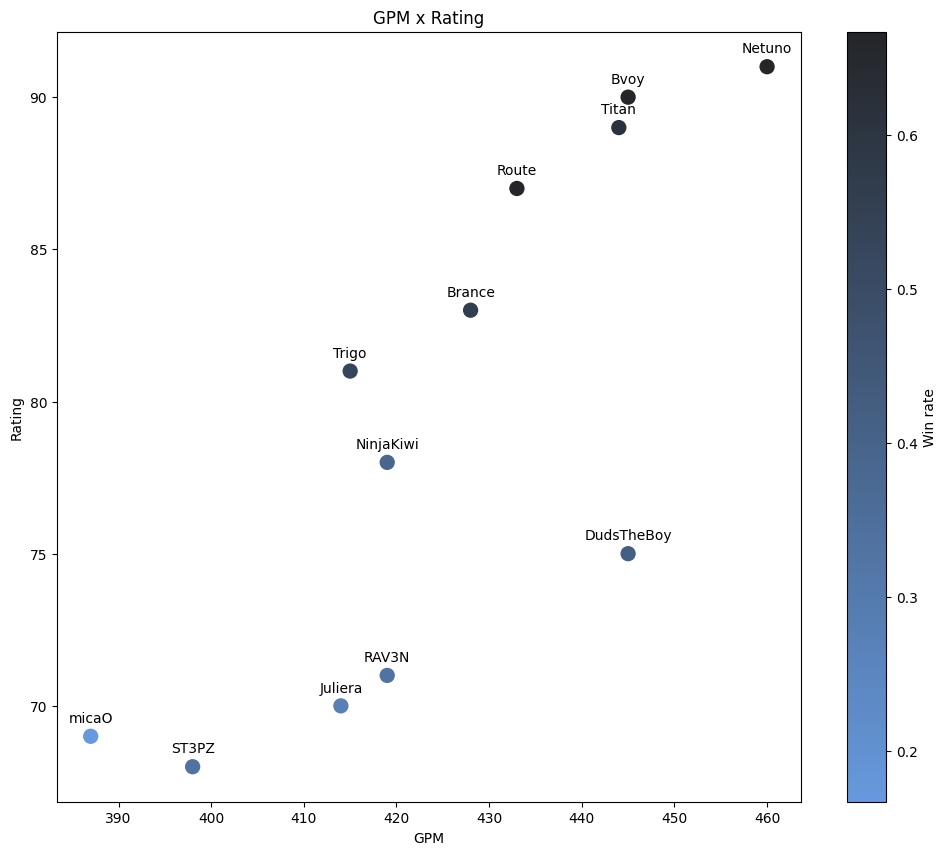

In [ ]:
# Configurar a paleta de cores
cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True)

# Criar o gráfico de dispersão
fig, ax = plt.subplots(figsize=(12, 10))
points = ax.scatter(x='GPM', y='Rating', c='Win rate', cmap=cmap, data=df_adc, s=100)

# Adicionar o nome do jogador em cada ponto
for i, player in enumerate(df_adc['Player']):
    ax.annotate(player, (df_adc['GPM'][i], df_adc['Rating'][i]), fontsize=10, textcoords="offset points", xytext=(0,10), ha='center')

# Adicionar barra de cores
cbar = plt.colorbar(points)
cbar.ax.set_ylabel('Win rate')

# Configurar o título e os eixos
ax.set_title('GPM x Rating')
ax.set_xlabel('GPM')
ax.set_ylabel('Rating')

plt.show()

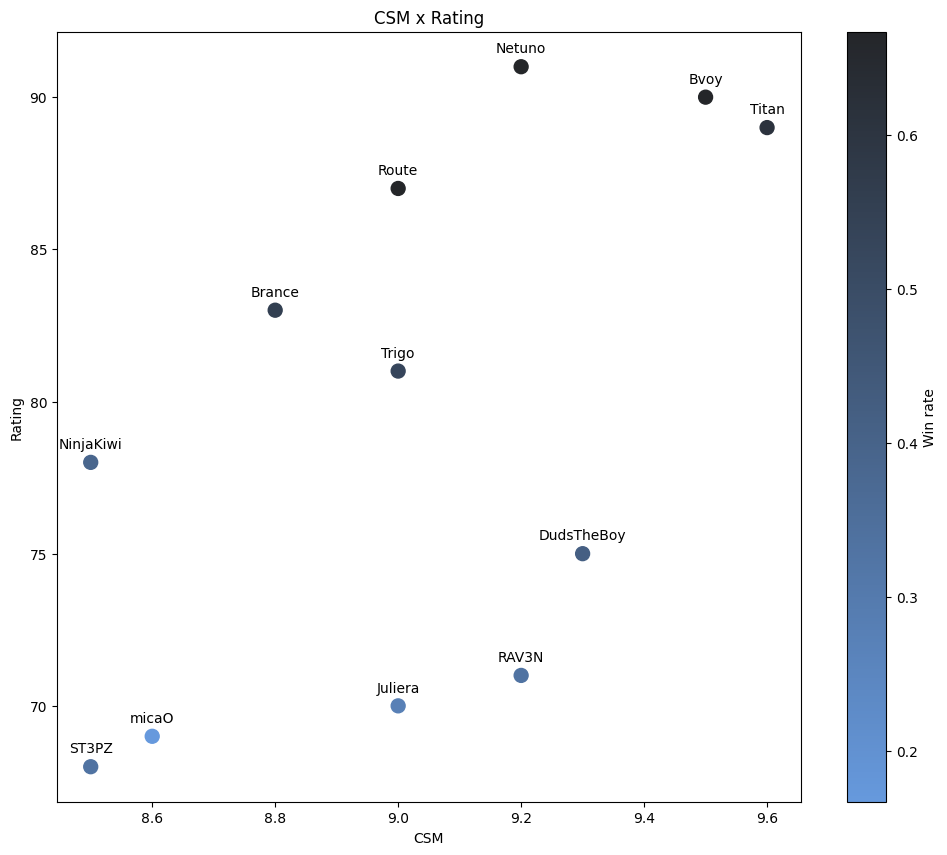

In [ ]:
# Configurar a paleta de cores
cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True)

# Criar o gráfico de dispersão
fig, ax = plt.subplots(figsize=(12, 10))
points = ax.scatter(x='CSM', y='Rating', c='Win rate', cmap=cmap, data=df_adc, s=100)

# Adicionar o nome do jogador em cada ponto
for i, player in enumerate(df_adc['Player']):
    ax.annotate(player, (df_adc['CSM'][i], df_adc['Rating'][i]), fontsize=10, textcoords="offset points", xytext=(0,10), ha='center')

# Adicionar barra de cores
cbar = plt.colorbar(points)
cbar.ax.set_ylabel('Win rate')

# Configurar o título e os eixos
ax.set_title('CSM x Rating')
ax.set_xlabel('CSM')
ax.set_ylabel('Rating')

plt.show()

Com as análises dos dados podemos inferir que as melhores estatísticas para descrever a perfomance dos players Adcarrys foram 


*   KDA
*   DPM
*   GPM

Podemos perceber que são muito parecidas com a da mid lane, já que os jogadores possuem funções semelhantes na partida.







## <font color ="#00b8ff">Análise dos Supports   </font>


In [ ]:
df_support = df_support.reset_index(drop=True)

df_support

,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,...,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15,Rating
0,Ayu,BR,SUPPORT,9,0.667,6.3,1.0,1.7,9.4,1.4,...,13.3,289,3.98,1.06,0.59,0.41,345.0,1.0,22.0,82
1,Bounty,BR,SUPPORT,6,0.167,2.6,0.5,3.3,8.0,0.6,...,8.0,162,2.84,1.51,0.35,0.54,130.0,2.0,-101.0,64
2,Cavalo,BR,SUPPORT,18,0.278,3.1,0.9,2.7,7.2,0.8,...,10.8,235,3.06,1.46,0.43,0.52,-231.0,-3.0,-81.0,69
3,Ceos,BR,SUPPORT,18,0.667,5.3,1.3,2.1,9.9,0.9,...,8.5,197,2.86,1.20,0.33,0.44,160.0,7.0,89.0,88
4,Damage,BR,SUPPORT,18,0.667,3.5,0.4,2.6,8.7,0.8,...,7.6,156,2.87,1.17,0.38,0.48,105.0,0.0,-12.0,82
5,Guigs,BR,SUPPORT,6,0.333,4.0,1.8,2.5,8.2,1.2,...,8.7,198,3.93,2.24,0.57,0.52,133.0,6.0,-114.0,69
6,JoJo,BR,SUPPORT,18,0.556,5.1,0.7,2.2,10.6,0.7,...,10.7,258,2.87,1.16,0.36,0.40,88.0,-5.0,-158.0,84
7,Krastyel,BR,SUPPORT,12,0.333,3.9,0.7,2.9,10.8,0.9,...,8.7,192,3.19,1.19,0.53,0.52,-3.0,-2.0,231.0,71
8,Kuri,KR,SUPPORT,10,0.600,7.9,0.7,1.3,9.6,0.6,...,8.8,175,2.70,1.30,0.26,0.44,-177.0,-2.0,-248.0,87
9,Nia,KR,SUPPORT,18,0.389,2.1,1.1,4.7,8.7,1.1,...,10.0,224,3.25,1.43,0.45,0.52,-105.0,3.0,13.0,69


<ipython-input-39-3dfb9e6b8905>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_support = df_support.corr()


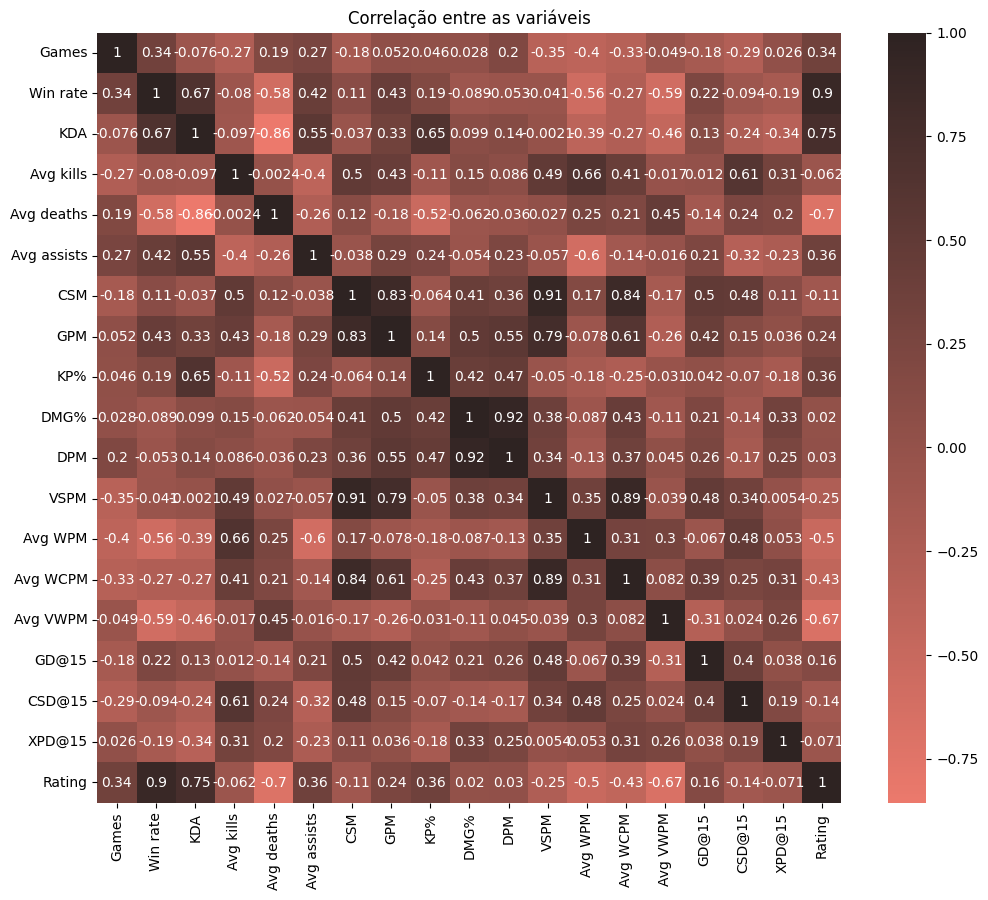

In [ ]:
corr_support = df_support.corr()

# Gerar o heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_support, annot=True, cmap = sns.color_palette("dark:salmon_r", as_cmap=True), center=0)

# Configurar o título do heatmap
plt.title('Correlação entre as variáveis')

# Mostrar o heatmap
plt.show()



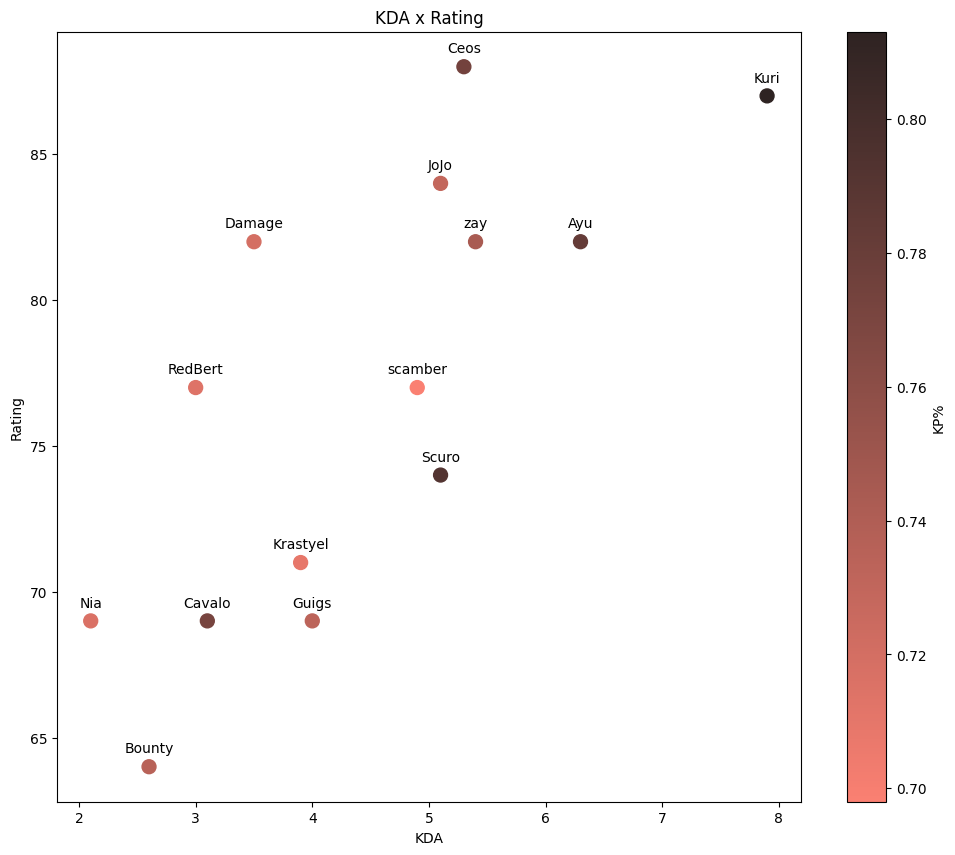

In [ ]:
# Configurar a paleta de cores
cmap = sns.color_palette("dark:salmon_r", as_cmap=True)

# Criar o gráfico de dispersão
fig, ax = plt.subplots(figsize=(12, 10))
points = ax.scatter(x='KDA', y='Rating', c='KP%', cmap=cmap, data=df_support, s=100)

# Adicionar o nome do jogador em cada ponto
for i, player in enumerate(df_support['Player']):
    ax.annotate(player, (df_support['KDA'][i], df_support['Rating'][i]), fontsize=10, textcoords="offset points", xytext=(0,10), ha='center')

# Adicionar barra de cores
cbar = plt.colorbar(points)
cbar.ax.set_ylabel('KP%')

# Configurar o título e os eixos
ax.set_title('KDA x Rating')
ax.set_xlabel('KDA')
ax.set_ylabel('Rating')

plt.show()

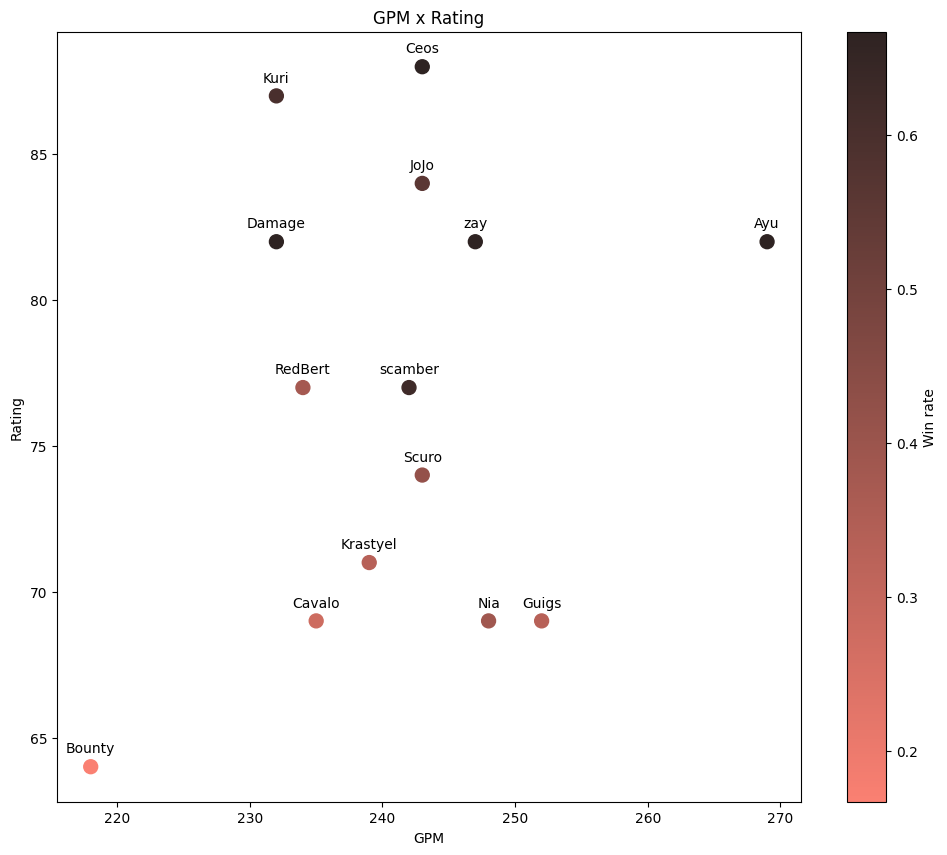

In [ ]:
# Configurar a paleta de cores
cmap = sns.color_palette("dark:salmon_r", as_cmap=True)

# Criar o gráfico de dispersão
fig, ax = plt.subplots(figsize=(12, 10))
points = ax.scatter(x='GPM', y='Rating', c='Win rate', cmap=cmap, data=df_support, s=100)

# Adicionar o nome do jogador em cada ponto
for i, player in enumerate(df_support['Player']):
    ax.annotate(player, (df_support['GPM'][i], df_support['Rating'][i]), fontsize=10, textcoords="offset points", xytext=(0,10), ha='center')

# Adicionar barra de cores
cbar = plt.colorbar(points)
cbar.ax.set_ylabel('Win rate')

# Configurar o título e os eixos
ax.set_title('GPM x Rating')
ax.set_xlabel('GPM')
ax.set_ylabel('Rating')

plt.show()

Com as análises dos dados podemos inferir que as melhores estatísticas para descrever a perfomance dos players Suportes foram 


*   KDA
*   GPM


Os padrões para Suportes foram pouca precisos. Por não obterem muitos recursos próprios e jogarem mais para o time, seu desempenho acaba sendo por fatores externos as estatísticas do jogo, como a comunicação ( o poder de ser shot caller), assim vamos priorizar poucos padrões estatísticos.




# <font color ="#00b8ff">Parte 4 - Utilizando as Análises dos Dados para Encontrar Jogadores Promissores </font>

## <font color ="#00b8ff">Importando Dataset Cblol Academy  </font>

In [ ]:
df_cbacad = pd.read_csv("https://raw.githubusercontent.com/GuiMunizPB/Cblol-Players-Stats/main/cblolAcadStats.csv")
df_cbacad.head()

,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,...,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15,FB %,FB Victim
0,Beta32,BR,TOP,1,0%,2.6,2.0,5.0,11.0,5.8,...,425,0.52,0.33,0.03,0.09,-1588,-26,-725,0%,0%
1,Betao,BR,TOP,15,66.7%,4.1,3.8,2.3,5.9,9.2,...,510,1.36,0.35,0.23,0.17,451,12,206,33.3%,13.3%
2,Eradan,BR,TOP,12,41.7%,1.9,2.5,3.8,4.7,7.7,...,507,1.17,0.37,0.18,0.24,-436,-17,-405,16.7%,16.7%
3,Gru,BR,TOP,16,50%,2.3,2.4,3.1,4.6,7.8,...,451,0.98,0.31,0.16,0.15,-454,-3,-119,12.5%,6.3%
4,Hidan,BR,TOP,16,62.5%,3.7,4.8,3.1,6.9,7.7,...,599,1.08,0.38,0.17,0.26,322,7,161,37.5%,6.3%


In [ ]:
print(f'Há valores NaN? {df_cbacad.isna().values.any()}')

Há valores NaN? False


In [ ]:
drop_columns = ['FB %', 'FB Victim']
df_cbacad = df_cbacad.drop(columns=drop_columns)

In [ ]:
df_cbacad['Win rate'] = df_cbacad['Win rate'].apply(percent_to_float)
df_cbacad['KP%'] = df_cbacad['KP%'].apply(percent_to_float)
df_cbacad['DMG%'] = df_cbacad['DMG%'].apply(percent_to_float)

In [ ]:
df_cbacad['VSPM'] = df_cbacad['VSPM'].astype(float, errors = 'raise')
df_cbacad['Avg WPM'] = df_cbacad['Avg WPM'].astype(float, errors = 'raise')
df_cbacad['GD@15'] = df_cbacad['GD@15'].astype(float, errors = 'raise')
df_cbacad['CSD@15'] = df_cbacad['CSD@15'].astype(float, errors = 'raise')
df_cbacad['XPD@15'] = df_cbacad['XPD@15'].astype(float, errors = 'raise')


In [ ]:
df_cbacad

,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,...,KP%,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15
0,Beta32,BR,TOP,1,0.000,2.6,2.0,5.0,11.0,5.8,...,0.765,17.9,425,0.52,0.33,0.03,0.09,-1588.0,-26.0,-725.0
1,Betao,BR,TOP,15,0.667,4.1,3.8,2.3,5.9,9.2,...,0.593,21.0,510,1.36,0.35,0.23,0.17,451.0,12.0,206.0
2,Eradan,BR,TOP,12,0.417,1.9,2.5,3.8,4.7,7.7,...,0.514,21.6,507,1.17,0.37,0.18,0.24,-436.0,-17.0,-405.0
3,Gru,BR,TOP,16,0.500,2.3,2.4,3.1,4.6,7.8,...,0.477,21.3,451,0.98,0.31,0.16,0.15,-454.0,-3.0,-119.0
4,Hidan,BR,TOP,16,0.625,3.7,4.8,3.1,6.9,7.7,...,0.618,23.8,599,1.08,0.38,0.17,0.26,322.0,7.0,161.0
5,Lukshy,BR,TOP,2,1.000,3.5,5.0,4.0,9.0,8.0,...,0.733,19.8,566,1.20,0.44,0.21,0.13,366.0,3.0,-206.0
6,Makes,BR,TOP,16,0.375,1.5,3.2,4.4,3.4,7.6,...,0.578,24.4,571,1.03,0.32,0.15,0.16,-79.0,1.0,-262.0
7,Mito,BR,TOP,16,0.375,2.4,2.5,3.4,5.8,7.3,...,0.595,20.7,450,1.17,0.32,0.19,0.22,-657.0,-13.0,-350.0
8,Paclo,BR,TOP,4,0.500,2.5,0.5,3.8,9.0,6.7,...,0.551,19.2,467,0.98,0.18,0.17,0.27,42.0,-4.0,-176.0
9,SkB,BR,TOP,14,0.214,2.0,1.8,3.4,5.1,8.1,...,0.550,21.5,459,1.20,0.39,0.18,0.26,4.0,4.0,-3.0


In [ ]:
dfcbacad_top = df_cbacad.loc[df_cbacad['Position'] == 'TOP']
dfcbacad_jungle = df_cbacad.loc[df_cbacad['Position'] == 'JUNGLE']
dfcbacad_mid = df_cbacad.loc[df_cbacad['Position'] == 'MID']
dfcbacad_adc = df_cbacad.loc[df_cbacad['Position'] == 'ADC']
dfcbacad_support = df_cbacad.loc[df_cbacad['Position'] == 'SUPPORT']


## <font color ="#00b8ff">Busca pela Top lane  </font>

In [ ]:
dfcbacad_top

,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,...,KP%,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15
0,Beta32,BR,TOP,1,0.000,2.6,2.0,5.0,11.0,5.8,...,0.765,17.9,425,0.52,0.33,0.03,0.09,-1588.0,-26.0,-725.0
1,Betao,BR,TOP,15,0.667,4.1,3.8,2.3,5.9,9.2,...,0.593,21.0,510,1.36,0.35,0.23,0.17,451.0,12.0,206.0
2,Eradan,BR,TOP,12,0.417,1.9,2.5,3.8,4.7,7.7,...,0.514,21.6,507,1.17,0.37,0.18,0.24,-436.0,-17.0,-405.0
3,Gru,BR,TOP,16,0.500,2.3,2.4,3.1,4.6,7.8,...,0.477,21.3,451,0.98,0.31,0.16,0.15,-454.0,-3.0,-119.0
4,Hidan,BR,TOP,16,0.625,3.7,4.8,3.1,6.9,7.7,...,0.618,23.8,599,1.08,0.38,0.17,0.26,322.0,7.0,161.0
5,Lukshy,BR,TOP,2,1.000,3.5,5.0,4.0,9.0,8.0,...,0.733,19.8,566,1.20,0.44,0.21,0.13,366.0,3.0,-206.0
6,Makes,BR,TOP,16,0.375,1.5,3.2,4.4,3.4,7.6,...,0.578,24.4,571,1.03,0.32,0.15,0.16,-79.0,1.0,-262.0
7,Mito,BR,TOP,16,0.375,2.4,2.5,3.4,5.8,7.3,...,0.595,20.7,450,1.17,0.32,0.19,0.22,-657.0,-13.0,-350.0
8,Paclo,BR,TOP,4,0.500,2.5,0.5,3.8,9.0,6.7,...,0.551,19.2,467,0.98,0.18,0.17,0.27,42.0,-4.0,-176.0
9,SkB,BR,TOP,14,0.214,2.0,1.8,3.4,5.1,8.1,...,0.550,21.5,459,1.20,0.39,0.18,0.26,4.0,4.0,-3.0


*   KDA
*   KP%
*   VSPM
*   GPM

In [ ]:
sorted_kda_top = dfcbacad_top[['Player', 'KDA']].sort_values('KDA', ascending=False)
sorted_kda_top

,Player,KDA
11,Tyrin,6.5
1,Betao,4.1
10,SuperCleber,3.9
4,Hidan,3.7
5,Lukshy,3.5
0,Beta32,2.6
8,Paclo,2.5
7,Mito,2.4
3,Gru,2.3
9,SkB,2.0


In [ ]:
sorted_kp_top = dfcbacad_top[['Player', 'KP%']].sort_values('KP%', ascending=False)
sorted_kp_top


,Player,KP%
0,Beta32,0.765
5,Lukshy,0.733
12,Yupps,0.666
4,Hidan,0.618
7,Mito,0.595
1,Betao,0.593
6,Makes,0.578
11,Tyrin,0.569
8,Paclo,0.551
9,SkB,0.550


In [ ]:
sorted_vspm_top = dfcbacad_top[['Player', 'VSPM']].sort_values('VSPM', ascending=False)
sorted_vspm_top


,Player,VSPM
1,Betao,1.36
10,SuperCleber,1.25
5,Lukshy,1.20
9,SkB,1.20
2,Eradan,1.17
7,Mito,1.17
4,Hidan,1.08
11,Tyrin,1.08
6,Makes,1.03
12,Yupps,1.01


In [ ]:
sorted_gpm_top = dfcbacad_top[['Player', 'GPM']].sort_values('GPM', ascending=False)
sorted_gpm_top


,Player,GPM
1,Betao,441
11,Tyrin,427
5,Lukshy,426
12,Yupps,408
4,Hidan,405
10,SuperCleber,403
2,Eradan,379
3,Gru,378
6,Makes,375
7,Mito,375


In [ ]:
selected_players_top = dfcbacad_top.loc[dfcbacad_top['Player'].isin(['Hidan', 'Tyrin', 'Betao', 'SuperCleber'])]
pd.set_option('display.max_columns', None)

selected_players_top

,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,GPM,KP%,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15
1,Betao,BR,TOP,15,0.667,4.1,3.8,2.3,5.9,9.2,441,0.593,21.0,510,1.36,0.35,0.23,0.17,451.0,12.0,206.0
4,Hidan,BR,TOP,16,0.625,3.7,4.8,3.1,6.9,7.7,405,0.618,23.8,599,1.08,0.38,0.17,0.26,322.0,7.0,161.0
10,SuperCleber,BR,TOP,16,0.688,3.9,3.3,2.5,6.6,7.5,403,0.519,22.2,588,1.25,0.38,0.17,0.23,504.0,4.0,332.0
11,Tyrin,BR,TOP,16,0.750,6.5,4.3,1.5,5.6,8.5,427,0.569,23.3,573,1.08,0.38,0.13,0.18,9.0,-2.0,229.0


In [ ]:
from sklearn.preprocessing import MaxAbsScaler

# cria um objeto scaler para a normalização Z-score
scaler = MaxAbsScaler()

# aplica a normalização para as colunas selecionadas
cols_to_normalize = ['KDA', 'KP%', 'VSPM', 'GPM', 'CSM', 'XPD@15', 'Avg assists']
selected_players_top_copy = selected_players_top.copy()
selected_players_top_copy[cols_to_normalize] = scaler.fit_transform(selected_players_top_copy[cols_to_normalize])

# calcula a média das colunas normalizadas
selected_players_top_copy['mean_normalized'] = selected_players_top_copy[cols_to_normalize].mean(axis=1)
selected_players_top_copy


,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,GPM,KP%,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15,mean_normalized
1,Betao,BR,TOP,15,0.667,0.630769,3.8,2.3,0.855072,1.000000,1.000000,0.959547,21.0,510,1.000000,0.35,0.23,0.17,451.0,12.0,0.620482,0.866553
4,Hidan,BR,TOP,16,0.625,0.569231,4.8,3.1,1.000000,0.836957,0.918367,1.000000,23.8,599,0.794118,0.38,0.17,0.26,322.0,7.0,0.484940,0.800516
10,SuperCleber,BR,TOP,16,0.688,0.600000,3.3,2.5,0.956522,0.815217,0.913832,0.839806,22.2,588,0.919118,0.38,0.17,0.23,504.0,4.0,1.000000,0.863499
11,Tyrin,BR,TOP,16,0.750,1.000000,4.3,1.5,0.811594,0.923913,0.968254,0.920712,23.3,573,0.794118,0.38,0.13,0.18,9.0,-2.0,0.689759,0.872621


O player para Top lane escolhido foi o: **Tyrin**



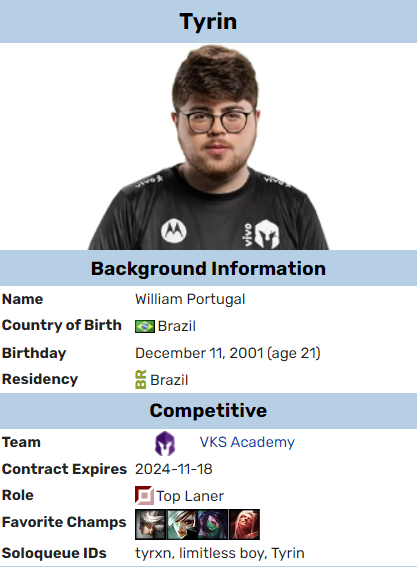

## <font color ="#00b8ff">Busca pela Jungle  </font>

In [ ]:
dfcbacad_jungle = dfcbacad_jungle.reset_index(drop=True)

dfcbacad_jungle

,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,GPM,KP%,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15
0,Ancrath,BR,JUNGLE,16,0.375,2.5,3.1,3.7,6.3,5.5,341,0.717,18.4,429,1.61,0.24,0.43,0.22,-161.0,2.0,-151.0
1,CrjaY,BR,JUNGLE,1,0.000,0.8,0.0,6.0,5.0,4.2,273,0.556,8.8,146,1.17,0.40,0.23,0.37,-541.0,-17.0,-475.0
2,Drakehero,BR,JUNGLE,16,0.313,2.3,2.0,3.6,6.4,5.1,307,0.643,13.4,306,1.55,0.36,0.42,0.35,-169.0,5.0,116.0
3,Mousty,BR,JUNGLE,16,0.375,2.0,1.7,3.8,5.9,4.9,313,0.709,14.8,341,1.58,0.21,0.42,0.27,205.0,-1.0,-17.0
4,Samkz,BR,JUNGLE,16,0.688,4.4,3.9,3.1,9.8,5.1,355,0.715,16.9,441,1.40,0.36,0.23,0.34,335.0,1.0,112.0
5,Soweto,BR,JUNGLE,16,0.625,2.8,2.7,4.1,8.7,5.1,331,0.690,14.8,348,1.73,0.32,0.40,0.36,250.0,5.0,243.0
6,StineR,BR,JUNGLE,16,0.500,2.7,2.2,3.7,7.9,4.5,314,0.721,15.7,338,1.65,0.40,0.38,0.38,-289.0,-8.0,-401.0
7,Tatu,BR,JUNGLE,16,0.438,2.7,1.6,3.5,7.8,4.9,311,0.686,17.3,393,1.47,0.27,0.40,0.29,-264.0,-8.0,-352.0
8,anato,BR,JUNGLE,16,0.313,2.4,1.1,3.7,7.7,4.8,307,0.755,14.0,295,1.50,0.28,0.32,0.34,-15.0,3.0,138.0
9,enel1,BR,JUNGLE,15,0.667,5.2,3.7,2.5,9.6,5.4,349,0.703,17.7,459,1.52,0.33,0.32,0.29,86.0,-1.0,122.0


*   KDA
*   DPM
*   CSM
*   GPM


In [ ]:
sorted_kda_jungle = dfcbacad_jungle[['Player', 'KDA']].sort_values('KDA', ascending=False)
sorted_kda_jungle

,Player,KDA
9,enel1,5.2
4,Samkz,4.4
5,Soweto,2.8
6,StineR,2.7
7,Tatu,2.7
0,Ancrath,2.5
8,anato,2.4
2,Drakehero,2.3
3,Mousty,2.0
1,CrjaY,0.8


In [ ]:
sorted_dpm_jungle = dfcbacad_jungle[['Player', 'DPM']].sort_values('DPM', ascending=False)
sorted_dpm_jungle

,Player,DPM
9,enel1,459
4,Samkz,441
0,Ancrath,429
7,Tatu,393
5,Soweto,348
3,Mousty,341
6,StineR,338
2,Drakehero,306
8,anato,295
1,CrjaY,146


In [ ]:
sorted_csm_jungle = dfcbacad_jungle[['Player', 'CSM']].sort_values('CSM', ascending=False)
sorted_csm_jungle

,Player,CSM
0,Ancrath,5.5
9,enel1,5.4
2,Drakehero,5.1
4,Samkz,5.1
5,Soweto,5.1
3,Mousty,4.9
7,Tatu,4.9
8,anato,4.8
6,StineR,4.5
1,CrjaY,4.2


In [ ]:
sorted_gpm_jungle = dfcbacad_jungle[['Player', 'GPM']].sort_values('GPM', ascending=False)
sorted_gpm_jungle

,Player,GPM
4,Samkz,355
9,enel1,349
0,Ancrath,341
5,Soweto,331
6,StineR,314
3,Mousty,313
7,Tatu,311
2,Drakehero,307
8,anato,307
1,CrjaY,273


In [ ]:
selected_players_jungle = dfcbacad_jungle.loc[dfcbacad_jungle['Player'].isin(['enel1', 'Samkz', 'Ancrath', 'Soweto'])]
pd.set_option('display.max_columns', None)

selected_players_jungle

,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,GPM,KP%,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15
0,Ancrath,BR,JUNGLE,16,0.375,2.5,3.1,3.7,6.3,5.5,341,0.717,18.4,429,1.61,0.24,0.43,0.22,-161.0,2.0,-151.0
4,Samkz,BR,JUNGLE,16,0.688,4.4,3.9,3.1,9.8,5.1,355,0.715,16.9,441,1.40,0.36,0.23,0.34,335.0,1.0,112.0
5,Soweto,BR,JUNGLE,16,0.625,2.8,2.7,4.1,8.7,5.1,331,0.690,14.8,348,1.73,0.32,0.40,0.36,250.0,5.0,243.0
9,enel1,BR,JUNGLE,15,0.667,5.2,3.7,2.5,9.6,5.4,349,0.703,17.7,459,1.52,0.33,0.32,0.29,86.0,-1.0,122.0


In [ ]:
from sklearn.preprocessing import MaxAbsScaler

# cria um objeto scaler para a normalização Z-score
scaler = MaxAbsScaler()

# aplica a normalização para as colunas selecionadas
cols_to_normalize = ['KDA', 'GPM', 'CSM', 'DPM', 'Avg assists','XPD@15','VSPM']
selected_players_jungle_copy = selected_players_jungle.copy()
selected_players_jungle_copy[cols_to_normalize] = scaler.fit_transform(selected_players_jungle_copy[cols_to_normalize])

# calcula a média das colunas normalizadas
selected_players_jungle_copy['mean_normalized'] = selected_players_jungle_copy[cols_to_normalize].mean(axis=1)
selected_players_jungle_copy


,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,GPM,KP%,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15,mean_normalized
0,Ancrath,BR,JUNGLE,16,0.375,0.480769,3.1,3.7,0.642857,1.000000,0.960563,0.717,18.4,0.934641,0.930636,0.24,0.43,0.22,-161.0,2.0,-0.621399,0.618295
4,Samkz,BR,JUNGLE,16,0.688,0.846154,3.9,3.1,1.000000,0.927273,1.000000,0.715,16.9,0.960784,0.809249,0.36,0.23,0.34,335.0,1.0,0.460905,0.857766
5,Soweto,BR,JUNGLE,16,0.625,0.538462,2.7,4.1,0.887755,0.927273,0.932394,0.690,14.8,0.758170,1.000000,0.32,0.40,0.36,250.0,5.0,1.000000,0.863436
9,enel1,BR,JUNGLE,15,0.667,1.000000,3.7,2.5,0.979592,0.981818,0.983099,0.703,17.7,1.000000,0.878613,0.33,0.32,0.29,86.0,-1.0,0.502058,0.903597


O jungle escolhido foi o: **enel1**



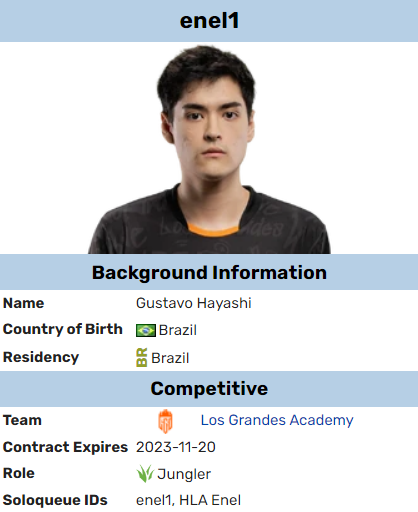

## <font color ="#00b8ff"> Busca pela Mid lane   </font>

In [ ]:
dfcbacad_mid = dfcbacad_mid.reset_index(drop=True)

dfcbacad_mid 

,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,GPM,KP%,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15
0,Aithusa,BR,MID,15,0.667,4.0,5.1,2.6,5.3,8.1,409,0.657,26.7,618,1.36,0.38,0.22,0.17,-64.0,-1.0,88.0
1,Blacky,BR,MID,16,0.438,3.0,4.5,3.0,4.6,8.1,403,0.678,27.2,627,1.06,0.29,0.23,0.20,-129.0,3.0,-83.0
2,Dioge,BR,MID,16,0.688,7.0,5.3,1.9,8.3,8.3,439,0.708,25.5,668,1.07,0.27,0.14,0.15,607.0,2.0,258.0
3,Fuuu,BR,MID,16,0.500,4.4,4.2,2.2,5.4,7.6,389,0.660,25.4,569,1.02,0.31,0.18,0.19,-135.0,-5.0,-110.0
4,Leleko,BR,MID,10,0.600,4.0,3.5,2.7,7.4,7.7,384,0.718,22.4,506,1.22,0.24,0.32,0.21,7.0,-4.0,-9.0
5,Picknn,BR,MID,16,0.375,3.3,3.1,3.1,7.1,8.2,382,0.700,25.6,572,1.45,0.34,0.24,0.16,-82.0,1.0,64.0
6,Qats,BR,MID,16,0.313,2.6,2.9,3.1,4.9,8.0,383,0.619,26.7,570,1.35,0.32,0.21,0.19,-148.0,-6.0,60.0
7,Ryanzin,BR,MID,15,0.267,2.3,3.6,3.6,4.7,8.3,395,0.644,28.2,623,1.00,0.26,0.18,0.16,-181.0,5.0,-3.0
8,SkB,BR,MID,1,1.000,15.0,3.0,1.0,12.0,7.0,360,0.833,26.4,621,1.18,0.59,0.24,0.24,480.0,20.0,267.0
9,Tutsz,BR,MID,16,0.375,3.1,2.8,2.5,5.0,8.6,393,0.710,29.5,664,1.30,0.32,0.22,0.18,191.0,13.0,182.0


*   KDA
*   DPM
*   CSM
*   GPM

In [ ]:
sorted_kda_mid = dfcbacad_mid[['Player', 'KDA']].sort_values('KDA', ascending=False)
sorted_kda_mid

,Player,KDA
8,SkB,15.0
2,Dioge,7.0
3,Fuuu,4.4
10,neyzz,4.3
0,Aithusa,4.0
4,Leleko,4.0
5,Picknn,3.3
9,Tutsz,3.1
1,Blacky,3.0
6,Qats,2.6


In [ ]:
sorted_dpm_mid = dfcbacad_mid[['Player', 'DPM']].sort_values('DPM', ascending=False)
sorted_dpm_mid

,Player,DPM
2,Dioge,668
9,Tutsz,664
1,Blacky,627
7,Ryanzin,623
8,SkB,621
0,Aithusa,618
10,neyzz,600
5,Picknn,572
6,Qats,570
3,Fuuu,569


In [ ]:
sorted_csm_mid = dfcbacad_mid[['Player', 'CSM']].sort_values('CSM', ascending=False)
sorted_csm_mid

,Player,CSM
9,Tutsz,8.6
2,Dioge,8.3
7,Ryanzin,8.3
5,Picknn,8.2
0,Aithusa,8.1
1,Blacky,8.1
6,Qats,8.0
4,Leleko,7.7
3,Fuuu,7.6
10,neyzz,7.4


In [ ]:
sorted_gpm_mid = dfcbacad_mid[['Player', 'GPM']].sort_values('GPM', ascending=False)
sorted_gpm_mid

,Player,GPM
2,Dioge,439
0,Aithusa,409
1,Blacky,403
7,Ryanzin,395
9,Tutsz,393
3,Fuuu,389
10,neyzz,385
4,Leleko,384
6,Qats,383
5,Picknn,382


In [ ]:
selected_players_mid = dfcbacad_mid.loc[dfcbacad_mid['Player'].isin(['Dioge', 'Fuuu', 'Aithusa', 'neyzz'])]
pd.set_option('display.max_columns', None)

selected_players_mid

,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,GPM,KP%,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15
0,Aithusa,BR,MID,15,0.667,4.0,5.1,2.6,5.3,8.1,409,0.657,26.7,618,1.36,0.38,0.22,0.17,-64.0,-1.0,88.0
2,Dioge,BR,MID,16,0.688,7.0,5.3,1.9,8.3,8.3,439,0.708,25.5,668,1.07,0.27,0.14,0.15,607.0,2.0,258.0
3,Fuuu,BR,MID,16,0.500,4.4,4.2,2.2,5.4,7.6,389,0.660,25.4,569,1.02,0.31,0.18,0.19,-135.0,-5.0,-110.0
10,neyzz,BR,MID,16,0.625,4.3,4.5,2.9,8.0,7.4,385,0.689,23.9,600,1.21,0.31,0.24,0.22,-271.0,-9.0,-379.0


In [ ]:
from sklearn.preprocessing import MaxAbsScaler

# cria um objeto scaler para a normalização Z-score
scaler = MaxAbsScaler()

# aplica a normalização para as colunas selecionadas
cols_to_normalize = ['KDA', 'GPM', 'CSM', 'DPM','XPD@15']
selected_players_mid_copy = selected_players_mid.copy()
selected_players_mid_copy[cols_to_normalize] = scaler.fit_transform(selected_players_mid_copy[cols_to_normalize])

# calcula a média das colunas normalizadas
selected_players_mid_copy['mean_normalized'] = selected_players_mid_copy[cols_to_normalize].mean(axis=1)
selected_players_mid_copy


,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,GPM,KP%,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15,mean_normalized
0,Aithusa,BR,MID,15,0.667,0.571429,5.1,2.6,5.3,0.975904,0.931663,0.657,26.7,0.925150,1.36,0.38,0.22,0.17,-64.0,-1.0,0.232190,0.727267
2,Dioge,BR,MID,16,0.688,1.000000,5.3,1.9,8.3,1.000000,1.000000,0.708,25.5,1.000000,1.07,0.27,0.14,0.15,607.0,2.0,0.680739,0.936148
3,Fuuu,BR,MID,16,0.500,0.628571,4.2,2.2,5.4,0.915663,0.886105,0.660,25.4,0.851796,1.02,0.31,0.18,0.19,-135.0,-5.0,-0.290237,0.598380
10,neyzz,BR,MID,16,0.625,0.614286,4.5,2.9,8.0,0.891566,0.876993,0.689,23.9,0.898204,1.21,0.31,0.24,0.22,-271.0,-9.0,-1.000000,0.456210


O player escolhido para a mid lane foi o: **Dioge**



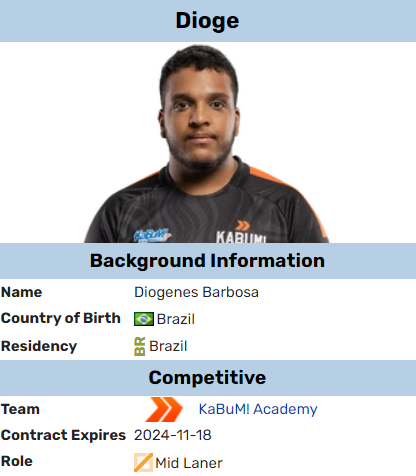

## <font color ="#00b8ff">Busca pelo ADC (Nosso jogador Import)   </font>

### <font color ="#00b8ff">Importando Dataset Adcs das Ligas Minor  </font>

Os times brasileiros têm direito a escolher dois jogadores 'importados' de outras ligas pelo mundo, jogadores estrangeiros para compor seu time.

In [ ]:
df_minorLeagues = pd.read_csv("https://raw.githubusercontent.com/GuiMunizPB/Cblol-Players-Stats/main/minorLeaguesStats.csv")
df_minorLeagues.head()

,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,GPM,KP%,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15
0,5Kid,KR,ADC,23,56.5%,3.7,4.3,2.3,4.3,9.7,448,66.8%,30.2,711,1.51,0.41,0.38,0.19,367,15,146
1,Artemis,VN,ADC,21,66.7%,5.3,5.5,2.0,5.4,9.9,483,73%,27.9,608,1.32,0.19,0.35,0.15,409,5,213
2,Atlen,TW,ADC,21,66.7%,4.0,5.4,2.9,6.0,8.9,449,66.8%,27.6,690,1.11,0.26,0.33,0.10,157,3,137
3,Bruce,TW,ADC,18,44.4%,2.7,3.1,2.9,4.9,9.2,423,66.3%,29.2,599,1.41,0.28,0.39,0.19,-9,3,-55
4,Ceo,AR,ADC,20,55%,3.7,4.3,2.6,5.3,8.4,423,65.3%,24.6,578,1.55,0.37,0.28,0.20,138,-5,-8


In [ ]:
print(f'Há valores NaN? {df_cbacad.isna().values.any()}')

Há valores NaN? False


In [ ]:
df_minorLeagues['Win rate'] = df_minorLeagues['Win rate'].apply(percent_to_float)
df_minorLeagues['KP%'] = df_minorLeagues['KP%'].apply(percent_to_float)
df_minorLeagues['DMG%'] = df_minorLeagues['DMG%'].apply(percent_to_float)

In [ ]:
df_minorLeagues['VSPM'] = df_minorLeagues['VSPM'].astype(float, errors = 'raise')
df_minorLeagues['Avg WPM'] = df_minorLeagues['Avg WPM'].astype(float, errors = 'raise')
df_minorLeagues['GD@15'] = df_minorLeagues['GD@15'].astype(float, errors = 'raise')
df_minorLeagues['CSD@15'] = df_minorLeagues['CSD@15'].astype(float, errors = 'raise')
df_minorLeagues['XPD@15'] = df_minorLeagues['XPD@15'].astype(float, errors = 'raise')


In [ ]:
df_minorLeagues

,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,GPM,KP%,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15
0,5Kid,KR,ADC,23,0.565,3.7,4.3,2.3,4.3,9.7,448,0.668,30.2,711,1.51,0.41,0.38,0.19,367.0,15.0,146.0
1,Artemis,VN,ADC,21,0.667,5.3,5.5,2.0,5.4,9.9,483,0.730,27.9,608,1.32,0.19,0.35,0.15,409.0,5.0,213.0
2,Atlen,TW,ADC,21,0.667,4.0,5.4,2.9,6.0,8.9,449,0.668,27.6,690,1.11,0.26,0.33,0.10,157.0,3.0,137.0
3,Bruce,TW,ADC,18,0.444,2.7,3.1,2.9,4.9,9.2,423,0.663,29.2,599,1.41,0.28,0.39,0.19,-9.0,3.0,-55.0
4,Ceo,AR,ADC,20,0.550,3.7,4.3,2.6,5.3,8.4,423,0.653,24.6,578,1.55,0.37,0.28,0.20,138.0,-5.0,-8.0
5,Cheoni,KR,ADC,32,0.375,3.8,4.3,2.2,4.2,9.7,436,0.745,33.0,687,1.16,0.27,0.33,0.14,-136.0,1.0,-241.0
6,Cryscata,VN,ADC,19,0.526,3.2,4.0,2.8,4.9,8.8,420,0.695,29.9,648,1.33,0.26,0.39,0.16,-146.0,-3.0,-69.0
7,Danteh,NZ,ADC,8,0.375,2.8,3.6,2.6,3.8,8.7,405,0.754,28.9,539,0.99,0.24,0.23,0.04,12.0,2.0,72.0
8,Eddie,VN,ADC,18,0.389,3.6,4.6,2.2,3.3,9.7,443,0.672,29.9,680,1.39,0.21,0.39,0.13,5.0,-5.0,24.0
9,Feng,TW,ADC,19,0.579,4.5,3.4,1.8,4.9,9.4,416,0.681,29.2,606,1.37,0.38,0.40,0.23,28.0,1.0,16.0


### <font color ="#00b8ff">Análise dos Jogadores estrangeiros  </font>

*   KDA
*   DPM
*   GPM

In [ ]:
sorted_kda_adc = df_minorLeagues[['Player', 'KDA']].sort_values('KDA', ascending=False)
sorted_kda_adc

,Player,KDA
36,Wako,10.1
12,Hans SamD,9.4
38,Yutapon,8.1
16,LokeN,7.9
18,Marble,7.5
19,MnM,6.0
23,Raes,5.7
25,Shunn,5.3
1,Artemis,5.3
33,Violet,5.3


In [ ]:
sorted_dpm_adc = df_minorLeagues[['Player', 'DPM']].sort_values('DPM', ascending=False)
sorted_dpm_adc

,Player,DPM
36,Wako,813
13,Honey,724
33,Violet,713
0,5Kid,711
2,Atlen,690
5,Cheoni,687
12,Hans SamD,684
8,Eddie,680
23,Raes,679
38,Yutapon,669


In [ ]:
sorted_gpm_adc = df_minorLeagues[['Player', 'GPM']].sort_values('GPM', ascending=False)
sorted_gpm_adc

,Player,GPM
12,Hans SamD,514
38,Yutapon,485
1,Artemis,483
26,Slayder,474
23,Raes,470
36,Wako,469
28,Snaker,465
33,Violet,464
24,Shogun,460
22,Puddin,460


In [ ]:
selected_players_adc = df_minorLeagues.loc[df_minorLeagues['Player'].isin(['Hans SamD', 'Wako', 'Yutapon', 'LokeN','Violet','Artemis','Raes','5Kid'])]
pd.set_option('display.max_columns', None)

selected_players_adc

,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,GPM,KP%,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15
0,5Kid,KR,ADC,23,0.565,3.7,4.3,2.3,4.3,9.7,448,0.668,30.2,711,1.51,0.41,0.38,0.19,367.0,15.0,146.0
1,Artemis,VN,ADC,21,0.667,5.3,5.5,2.0,5.4,9.9,483,0.730,27.9,608,1.32,0.19,0.35,0.15,409.0,5.0,213.0
12,Hans SamD,KR,ADC,18,0.722,9.4,5.9,1.2,5.1,10.7,514,0.739,31.1,684,1.71,0.36,0.40,0.14,1022.0,17.0,415.0
16,LokeN,KR,ADC,32,0.781,7.9,4.7,1.3,5.2,9.6,459,0.679,27.6,645,1.54,0.37,0.43,0.18,104.0,4.0,242.0
23,Raes,NZ,ADC,27,0.519,5.7,6.3,2.3,6.6,9.1,470,0.695,28.7,679,1.20,0.37,0.30,0.13,406.0,7.0,45.0
33,Violet,VN,ADC,17,0.529,5.3,5.3,2.1,5.9,9.5,464,0.726,31.8,713,1.10,0.32,0.27,0.13,709.0,19.0,370.0
36,Wako,TW,ADC,18,0.833,10.1,5.1,1.1,6.1,9.6,469,0.700,33.1,813,1.97,0.36,0.49,0.17,407.0,9.0,400.0
38,Yutapon,JP,ADC,27,0.815,8.1,5.4,1.4,6.0,9.7,485,0.692,26.1,669,1.00,0.19,0.32,0.08,1040.0,11.0,656.0


In [ ]:
from sklearn.preprocessing import MaxAbsScaler

# cria um objeto scaler para a normalização Z-score
scaler = MaxAbsScaler()

# aplica a normalização para as colunas selecionadas
cols_to_normalize = ['KDA', 'GPM', 'CSM', 'DPM', 'CSD@15','XPD@15']
selected_players_adc_copy = selected_players_adc.copy()
selected_players_adc_copy[cols_to_normalize] = scaler.fit_transform(selected_players_adc_copy[cols_to_normalize])

# calcula a média das colunas normalizadas
selected_players_adc_copy['mean_normalized'] = selected_players_adc_copy[cols_to_normalize].mean(axis=1)
selected_players_adc_copy


,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,GPM,KP%,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15,mean_normalized
0,5Kid,KR,ADC,23,0.565,0.366337,4.3,2.3,4.3,0.906542,0.871595,0.668,30.2,0.874539,1.51,0.41,0.38,0.19,367.0,0.789474,0.222561,0.671841
1,Artemis,VN,ADC,21,0.667,0.524752,5.5,2.0,5.4,0.925234,0.939689,0.730,27.9,0.747847,1.32,0.19,0.35,0.15,409.0,0.263158,0.324695,0.620896
12,Hans SamD,KR,ADC,18,0.722,0.930693,5.9,1.2,5.1,1.000000,1.000000,0.739,31.1,0.841328,1.71,0.36,0.40,0.14,1022.0,0.894737,0.632622,0.883230
16,LokeN,KR,ADC,32,0.781,0.782178,4.7,1.3,5.2,0.897196,0.892996,0.679,27.6,0.793358,1.54,0.37,0.43,0.18,104.0,0.210526,0.368902,0.657526
23,Raes,NZ,ADC,27,0.519,0.564356,6.3,2.3,6.6,0.850467,0.914397,0.695,28.7,0.835178,1.20,0.37,0.30,0.13,406.0,0.368421,0.068598,0.600236
33,Violet,VN,ADC,17,0.529,0.524752,5.3,2.1,5.9,0.887850,0.902724,0.726,31.8,0.876999,1.10,0.32,0.27,0.13,709.0,1.000000,0.564024,0.792725
36,Wako,TW,ADC,18,0.833,1.000000,5.1,1.1,6.1,0.897196,0.912451,0.700,33.1,1.000000,1.97,0.36,0.49,0.17,407.0,0.473684,0.609756,0.815515
38,Yutapon,JP,ADC,27,0.815,0.801980,5.4,1.4,6.0,0.906542,0.943580,0.692,26.1,0.822878,1.00,0.19,0.32,0.08,1040.0,0.578947,1.000000,0.842321


O jogador escolhido para ser o adc foi o: **Hans SamD**
A escolha foi assim pois jogadores coreanos têm mais familiriadade no Brasil, a maioria dos imports do Cblol são Coreanos. Facilitação de contrato e por falarem inglês melhor, como outros fatores.


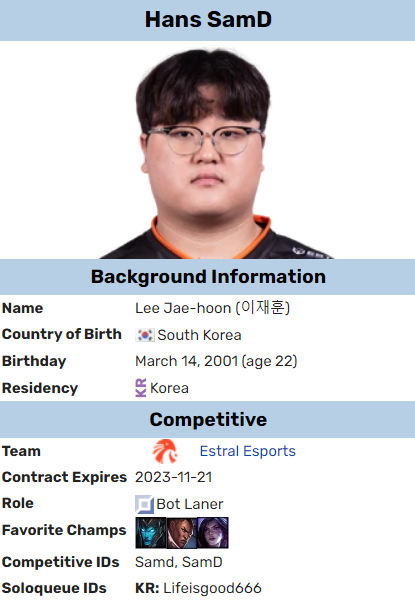

## <font color ="#00b8ff">Busca pelo Suporte   </font>

In [ ]:
dfcbacad_support = dfcbacad_support.reset_index(drop=True)

dfcbacad_support 

,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,GPM,KP%,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15
0,Griba,BR,SUPPORT,16,0.313,2.4,1.0,3.6,7.7,0.8,234,0.695,11.4,237,2.77,1.20,0.48,0.50,126.0,-2.0,-85.0
1,Kick,BR,SUPPORT,16,0.375,4.0,1.2,2.6,9.4,0.8,242,0.732,9.6,218,2.59,0.94,0.39,0.38,-96.0,-2.0,-205.0
2,Look,BR,SUPPORT,15,0.467,2.3,0.4,4.3,9.3,0.7,228,0.655,8.4,190,2.73,1.04,0.35,0.49,-467.0,-2.0,-298.0
3,Manel,BR,SUPPORT,6,0.500,3.0,2.3,3.7,8.7,1.2,256,0.617,10.5,245,3.34,0.91,0.57,0.46,572.0,6.0,282.0
4,Mido,BR,SUPPORT,16,0.625,6.2,1.6,2.2,12.0,0.9,254,0.734,8.6,221,2.99,1.24,0.47,0.47,-101.0,0.0,107.0
5,Momochi,BR,SUPPORT,16,0.313,3.0,1.1,3.0,7.9,0.8,235,0.727,13.0,279,2.99,1.17,0.35,0.42,-223.0,-1.0,-116.0
6,Stoneses,BR,SUPPORT,7,0.429,4.1,0.3,2.7,10.9,0.7,229,0.663,7.5,168,2.33,0.78,0.34,0.35,-109.0,-4.0,45.0
7,Telas,BR,SUPPORT,16,0.750,4.7,1.4,3.0,12.6,1.0,261,0.778,9.1,227,3.22,0.97,0.52,0.33,48.0,-1.0,146.0
8,Thominhas,BR,SUPPORT,1,0.000,4.0,2.0,2.0,6.0,0.5,229,0.727,6.8,154,2.19,0.00,0.16,0.50,1.0,0.0,-557.0
9,Vahvel,BR,SUPPORT,16,0.375,2.5,0.5,3.3,7.6,0.8,222,0.733,6.4,142,2.55,1.05,0.32,0.37,-236.0,3.0,-190.0


*   KDA
*   GPM

In [ ]:
sorted_kda_sup = dfcbacad_support[['Player', 'KDA']].sort_values('KDA', ascending=False)
sorted_kda_sup

,Player,KDA
4,Mido,6.2
7,Telas,4.7
6,Stoneses,4.1
1,Kick,4.0
8,Thominhas,4.0
3,Manel,3.0
5,Momochi,3.0
9,Vahvel,2.5
0,Griba,2.4
2,Look,2.3


In [ ]:
sorted_gpm_sup = dfcbacad_support[['Player', 'GPM']].sort_values('GPM', ascending=False)
sorted_gpm_sup

,Player,GPM
7,Telas,261
3,Manel,256
4,Mido,254
1,Kick,242
5,Momochi,235
0,Griba,234
6,Stoneses,229
8,Thominhas,229
2,Look,228
9,Vahvel,222


In [ ]:
selected_players_sup = dfcbacad_support.loc[dfcbacad_support['Player'].isin(['Guigs', 'Telas', 'Mido', 'Manel'])]
pd.set_option('display.max_columns', None)

selected_players_sup

,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,GPM,KP%,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15
3,Manel,BR,SUPPORT,6,0.500,3.0,2.3,3.7,8.7,1.2,256,0.617,10.5,245,3.34,0.91,0.57,0.46,572.0,6.0,282.0
4,Mido,BR,SUPPORT,16,0.625,6.2,1.6,2.2,12.0,0.9,254,0.734,8.6,221,2.99,1.24,0.47,0.47,-101.0,0.0,107.0
7,Telas,BR,SUPPORT,16,0.750,4.7,1.4,3.0,12.6,1.0,261,0.778,9.1,227,3.22,0.97,0.52,0.33,48.0,-1.0,146.0


In [ ]:
from sklearn.preprocessing import MaxAbsScaler

# cria um objeto scaler para a normalização Z-score
scaler = MaxAbsScaler()

# aplica a normalização para as colunas selecionadas
cols_to_normalize = ['KDA', 'GPM', 'Avg assists', 'VSPM', 'Avg WPM','Avg WCPM','Avg VWPM']
selected_players_sup_copy = selected_players_sup.copy()
selected_players_sup_copy[cols_to_normalize] = scaler.fit_transform(selected_players_sup_copy[cols_to_normalize])

# calcula a média das colunas normalizadas
selected_players_sup_copy['mean_normalized'] = selected_players_sup_copy[cols_to_normalize].mean(axis=1)
selected_players_sup_copy


,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,GPM,KP%,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15,mean_normalized
3,Manel,BR,SUPPORT,6,0.500,0.483871,2.3,3.7,0.690476,1.2,0.980843,0.617,10.5,245,1.000000,0.733871,1.000000,0.978723,572.0,6.0,282.0,0.838255
4,Mido,BR,SUPPORT,16,0.625,1.000000,1.6,2.2,0.952381,0.9,0.973180,0.734,8.6,221,0.895210,1.000000,0.824561,1.000000,-101.0,0.0,107.0,0.949333
7,Telas,BR,SUPPORT,16,0.750,0.758065,1.4,3.0,1.000000,1.0,1.000000,0.778,9.1,227,0.964072,0.782258,0.912281,0.702128,48.0,-1.0,146.0,0.874115


O jogador escolhido para ser o adc foi o: **Mido**


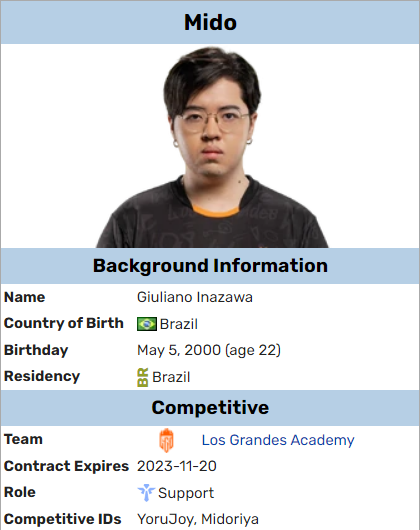



# <font color ="#00b8ff">Parte 5 - Montando os Dados Médios da Equipe Formada</font>

In [ ]:
selected_players_top
selected_players_jungle
selected_players_mid
selected_players_adc
selected_players_sup

,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,GPM,KP%,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15
3,Manel,BR,SUPPORT,6,0.500,3.0,2.3,3.7,8.7,1.2,256,0.617,10.5,245,3.34,0.91,0.57,0.46,572.0,6.0,282.0
4,Mido,BR,SUPPORT,16,0.625,6.2,1.6,2.2,12.0,0.9,254,0.734,8.6,221,2.99,1.24,0.47,0.47,-101.0,0.0,107.0
7,Telas,BR,SUPPORT,16,0.750,4.7,1.4,3.0,12.6,1.0,261,0.778,9.1,227,3.22,0.97,0.52,0.33,48.0,-1.0,146.0


In [ ]:
selected_players = selected_players_top.loc[selected_players_top['Player'] == 'Tyrin']
selected_players = pd.concat([selected_players, selected_players_jungle.loc[selected_players_jungle['Player'] == 'enel1']])
selected_players = pd.concat([selected_players, selected_players_mid.loc[selected_players_mid['Player'] == 'Dioge']])
selected_players = pd.concat([selected_players, selected_players_adc.loc[selected_players_adc['Player'] == 'Hans SamD']])
selected_players = pd.concat([selected_players, selected_players_sup.loc[selected_players_sup['Player'] == 'Mido']])

selected_players

,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,GPM,KP%,DMG%,DPM,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15
11,Tyrin,BR,TOP,16,0.750,6.5,4.3,1.5,5.6,8.5,427,0.569,23.3,573,1.08,0.38,0.13,0.18,9.0,-2.0,229.0
9,enel1,BR,JUNGLE,15,0.667,5.2,3.7,2.5,9.6,5.4,349,0.703,17.7,459,1.52,0.33,0.32,0.29,86.0,-1.0,122.0
2,Dioge,BR,MID,16,0.688,7.0,5.3,1.9,8.3,8.3,439,0.708,25.5,668,1.07,0.27,0.14,0.15,607.0,2.0,258.0
12,Hans SamD,KR,ADC,18,0.722,9.4,5.9,1.2,5.1,10.7,514,0.739,31.1,684,1.71,0.36,0.40,0.14,1022.0,17.0,415.0
4,Mido,BR,SUPPORT,16,0.625,6.2,1.6,2.2,12.0,0.9,254,0.734,8.6,221,2.99,1.24,0.47,0.47,-101.0,0.0,107.0


In [ ]:
selected_players = selected_players.reset_index(drop=True)


In [ ]:
selected_players = selected_players[['Player', 'GPM', 'Avg kills', 'Avg deaths', 'GD@15', 'CSM', 'DPM', 'Avg WPM', 'Avg VWPM']]
selected_players = selected_players.rename(columns={'Player': 'Name', 'Avg WPM': 'WPM', 'Avg VWPM': 'VWPM', 'Avg kills': 'Kills / game', 'Avg deaths': 'Deaths / game'})

# Adicionando informações extras
selected_players['Season'] = 'S13'
selected_players['Name'] = 'MoneyCblol'

# Criando o novo dataset
team_stats_df = pd.DataFrame(selected_players.sum()).transpose()
team_stats_df['K:D'] = team_stats_df['Kills / game'].sum() / team_stats_df['Deaths / game'].sum()



In [ ]:
team_stats_df

,Name,GPM,Kills / game,Deaths / game,GD@15,CSM,DPM,WPM,VWPM,Season,K:D
0,MoneyCblolMoneyCblolMoneyCblolMoneyCblolMoneyC...,1983,20.8,9.3,1623.0,33.8,2605,2.58,1.23,S13S13S13S13S13,2.236559


In [ ]:
# Adicionando informações extras
team_stats_df['Season'] = 'S13'
team_stats_df['Name'] = 'MoneyCblol'

In [ ]:
team_stats_df['Region'] = 'BR'


In [ ]:
team_stats_df

,Name,GPM,Kills / game,Deaths / game,GD@15,CSM,DPM,WPM,VWPM,Season,K:D,Region
0,MoneyCblol,1983,20.8,9.3,1623.0,33.8,2605,2.58,1.23,S13,2.236559,BR


In [ ]:
team_stats_df = team_stats_df.reindex(columns=['Name', 'Season', 'Region', 'K:D','GPM','Kills / game','Deaths / game', 'GD@15', 'CSM','DPM','WPM','VWPM'])


In [ ]:
team_stats_df

,Name,Season,Region,K:D,GPM,Kills / game,Deaths / game,GD@15,CSM,DPM,WPM,VWPM
0,MoneyCblol,S13,BR,2.236559,1983,20.8,9.3,1623.0,33.8,2605,2.58,1.23


# <font color ="#00b8ff">Parte 6 - Regressão Multivariável para prever desempenho do time </font>

## <font color ="#00b8ff">Tratando o Dataset das Ligas pelo Mundo   </font>

In [ ]:
df_leagues = pd.read_csv("https://raw.githubusercontent.com/GuiMunizPB/Cblol-Players-Stats/main/teamsStats.csv")
df_leagues.head()

,Name,Season,Region,Games,Win rate,K:D,GPM,Kills / game,Deaths / game,GD@15,CSM,DPM,WPM,VWPM,WCPM
0,100 Challengers,S13,NaN,36,61.1%,1.32,1860,14.2,10.6,246,33.2,2313,2.2,0.91,1.27
1,100 Thieves,S13,NaN,20,60.0%,1.21,1789,13.9,11.4,-248,32.1,2288,2.3,1.17,1.58
2,3BL Esports,S13,AL,14,28.6%,0.77,1719,14.1,18.3,-2385,31.1,2155,1.7,0.89,1.28
3,5 Ronin,S13,TR,14,7.1%,0.54,1596,7.5,13.9,-2083,30.2,1779,1.6,01.03,1.10
4,Aegis,S13,FR,18,61.1%,1.38,1813,14.8,10.7,486,32.1,2066,2.1,01.04,1.40


In [ ]:
print(f'Há valores NaN? {df_leagues.isna().values.any()}')

Há valores NaN? True


In [ ]:
df_leagues[df_leagues['Region'].isnull()]


,Name,Season,Region,Games,Win rate,K:D,GPM,Kills / game,Deaths / game,GD@15,CSM,DPM,WPM,VWPM,WCPM
0,100 Challengers,S13,NaN,36,61.1%,1.32,1860,14.2,10.6,246,33.2,2313,2.2,0.91,1.27
1,100 Thieves,S13,NaN,20,60.0%,1.21,1789,13.9,11.4,-248,32.1,2288,2.3,1.17,1.58
13,AOE Esports,S13,NaN,37,43.2%,0.79,1758,12.5,15.7,-32,31.5,2316,2.3,0.71,1.33
38,Cincinnati Fear,S13,NaN,38,63.2%,1.21,1848,14.8,12.2,757,31.7,2269,2.0,0.74,1.21
39,CLG,S13,NaN,19,52.6%,0.96,1785,12.5,12.9,228,32.9,2215,2.5,01.02,1.71
40,CLG Challengers,S13,NaN,38,60.5%,1.40,1830,15.0,10.8,1351,32.4,2363,2.4,0.98,1.30
41,CLG Faith,S13,NaN,35,5.7%,0.37,1550,6.8,18.4,-3923,29.4,1737,1.9,0.75,0.94
42,Cloud9,S13,NaN,19,78.9%,1.55,1899,14.2,9.1,919,33.4,2524,2.7,01.04,1.68
43,Cloud9 Challengers,S13,NaN,36,80.6%,2.19,1947,17.2,7.9,1889,32.8,2543,2.5,1.12,1.41
55,Dignitas,S13,NaN,18,16.7%,0.56,1620,8.1,14.4,-1221,31.0,1997,2.2,1.10,1.60


In [ ]:
df_leagues.Region.fillna('NA' , inplace = True)
df_leagues.Region.isnull().sum()


0

In [ ]:
df_leagues = df_leagues.replace('-', np.nan) 

df_leagues = df_leagues.dropna(axis=0)

df_leagues = df_leagues.reset_index(drop=True)


In [ ]:
df_leagues

,Name,Season,Region,Games,Win rate,K:D,GPM,Kills / game,Deaths / game,GD@15,CSM,DPM,WPM,VWPM,WCPM
0,100 Challengers,S13,NA,36,61.1%,1.32,1860,14.2,10.6,246,33.2,2313,2.2,0.91,1.27
1,100 Thieves,S13,NA,20,60.0%,1.21,1789,13.9,11.4,-248,32.1,2288,2.3,1.17,1.58
2,3BL Esports,S13,AL,14,28.6%,0.77,1719,14.1,18.3,-2385,31.1,2155,1.7,0.89,1.28
3,5 Ronin,S13,TR,14,7.1%,0.54,1596,7.5,13.9,-2083,30.2,1779,1.6,01.03,1.10
4,Aegis,S13,FR,18,61.1%,1.38,1813,14.8,10.7,486,32.1,2066,2.1,01.04,1.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,WLGaming Esports,S13,GR,18,66.7%,1.36,1911,18.6,13.7,1498,31.4,2574,2.3,01.08,1.29
256,XtremeDominators,S13,RS,14,0.0%,0.34,1529,7.3,21.5,-4142,28.3,1744,1.8,0.65,0.87
257,ZennIT Gaming,S13,BE,14,35.7%,0.81,1770,13.9,17.1,319,31.0,2157,2.0,0.75,1.17
258,Zero Tenacity,S13,PL,19,84.2%,1.68,1988,20.3,12.0,2697,32.2,2587,2.3,1.00,1.35


In [ ]:
# Aplica a função à coluna "Win Rate"
df_leagues['Win rate'] = df_leagues['Win rate'].apply(percent_to_float)

In [ ]:
df_leagues.dtypes

Name              object
Season            object
Region            object
Games              int64
Win rate         float64
K:D              float64
GPM                int64
Kills / game     float64
Deaths / game    float64
GD@15             object
CSM              float64
DPM                int64
WPM               object
VWPM              object
WCPM              object
dtype: object

In [ ]:
df_leagues['WPM'] = df_leagues['WPM'].astype(float, errors = 'raise')
df_leagues['VWPM'] = df_leagues['VWPM'].astype(float, errors = 'raise')
df_leagues['GD@15'] = df_leagues['GD@15'].astype(float, errors = 'raise')
df_leagues['WCPM'] = df_leagues['WCPM'].astype(float, errors = 'raise')


In [ ]:
df_leagues.dtypes

Name              object
Season            object
Region            object
Games              int64
Win rate         float64
K:D              float64
GPM                int64
Kills / game     float64
Deaths / game    float64
GD@15            float64
CSM              float64
DPM                int64
WPM              float64
VWPM             float64
WCPM             float64
dtype: object

## <font color ="#00b8ff">Treinamento do Modelo da Regressão   </font>

In [ ]:
target = df_leagues['Win rate']
features = df_leagues.drop(['Name','Games','Season','Region','Win rate','WCPM'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=10)


In [ ]:
train_pct = 100*len(X_train)/len(features)
print(f'Dados de treino são {train_pct:.3}% do total de dados.')

test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Dados de teste fazem parte dos {test_pct:0.3}% restantes.')

Dados de treino são 80.0% do total de dados.
Dados de teste fazem parte dos 20.0% restantes.


In [ ]:
regr = LinearRegression()
regr.fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)
rsquaredTest = regr.score(X_test, y_test)

print(f'R^2 dos dados de treino: {rsquared:.2}')
print(f'R^2 dos dados de teste: {rsquaredTest:.2}')


R^2 dos dados de treino: 0.91
R^2 dos dados de teste: 0.92


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Carregando os dados em um dataframe e dividindo em treino e teste

# Treino o modelo de regressão e faço a predição
y_pred = regr.predict(X_test)


# Calculando o erro médio absoluto (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Calculando o erro médio quadrático (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Calculando o erro quadrático médio da raiz (RMSE)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calculando o desvio padrão dos resíduos
residuals = y_test - y_pred
std_dev = np.std(residuals)
print("Desvio Padrão dos Resíduos:", std_dev)


MAE: 0.04548524951016675
MSE: 0.003517335063235941
RMSE: 0.05930712489436612
Desvio Padrão dos Resíduos: 0.05865642569902513


In [ ]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
K:D,-0.020285
GPM,0.001655
Kills / game,0.000393
Deaths / game,-0.030773
GD@15,-0.000025
CSM,-0.019393
DPM,0.000138
WPM,-0.006303
VWPM,0.004413


In [ ]:
predicted_vals = regr.predict(X_train)
residuals = (y_train - predicted_vals)

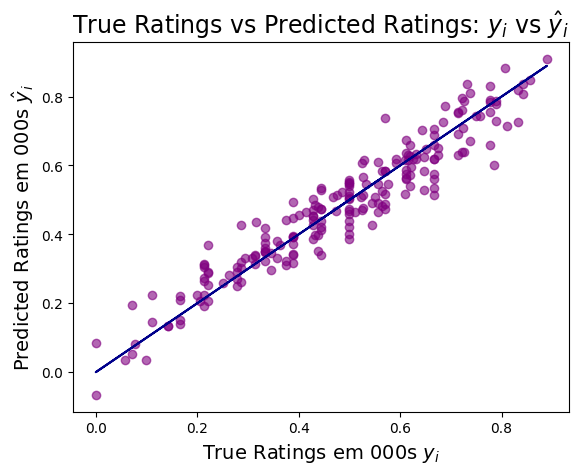

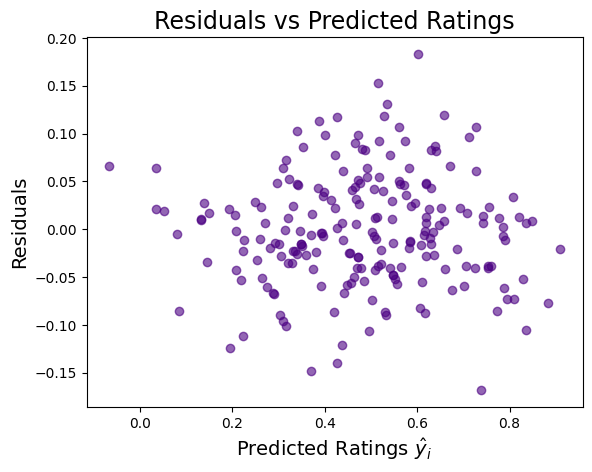

In [ ]:
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='purple', alpha=0.6)
plt.plot(y_train, y_train, color='darkblue')
plt.title(f'True Ratings vs Predicted Ratings: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('True Ratings em 000s $y _i$', fontsize=14)
plt.ylabel('Predicted Ratings em 000s $\hat y _i$', fontsize=14)
plt.show()

plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Ratings', fontsize=17)
plt.xlabel('Predicted Ratings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

In [ ]:
features = df_leagues.drop(['Name','Games','Season','Region','Win rate','WCPM'], axis=1)
average_vals = features.mean().values
stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
stats

,K:D,GPM,Kills / game,Deaths / game,GD@15,CSM,DPM,WPM,VWPM
0,1.040731,1785.938462,13.595,13.84,-55.365385,31.427692,2248.965385,2.236154,1.063769


In [ ]:
estimate = regr.predict(stats)[0]
print(f'Usando os valores o time terá um Win rate de {estimate:.2}')


Usando os valores o time terá um Win rate de 0.49


## <font color ="#00b8ff">O Desempenho do MoneyCblol   </font>

In [ ]:
team_stats_df

,Name,Season,Region,K:D,GPM,Kills / game,Deaths / game,GD@15,CSM,DPM,WPM,VWPM
0,MoneyCblol,S13,BR,2.236559,1983,20.8,9.3,1623.0,33.8,2605,2.58,1.23


In [ ]:
 team_stats_df1 = team_stats_df.drop(['Name','Season','Region'], axis=1)


In [ ]:
team_stats_df1

,K:D,GPM,Kills / game,Deaths / game,GD@15,CSM,DPM,WPM,VWPM
0,2.236559,1983,20.8,9.3,1623.0,33.8,2605,2.58,1.23


In [ ]:
for i in range(len(team_stats_df1)):
  time_name = team_stats_df['Name'][i]
  estimate = regr.predict(team_stats_df1.iloc[[i]])[0]
  print(f"O Time [{time_name}] terá um Win Rate de: {estimate * 100 :.3}%")
  

O Time [MoneyCblol] terá um Win Rate de: 89.6%


# <font color ="#00b8ff">Parte 7 -Conclusões </font>

A equipe "MoneyCblol" formada a partir da análise de dados, obteve bons resultados. Composta por jogadores do Cblol Academy e um coreano importado que já teve muita experiência, mas que atualmente joga em uma região Minor, a equipe tornou-se muito forte.

Vale ressaltar que essa análise apresenta limitações, já que as estatísticas de um jogador na liga Academy podem ser diferentes de sua performance em uma liga mais difícil. No entanto, como a previsão foi ajustada para o Cblol, esse problema foi atenuado.

Em resumo, seguindo o exemplo do filme "Moneyball", foi possível montar um time que teria uma taxa de vitória estimada de **89.6%**. 

Esse resultado é extremamente satisfatório e garante o título da fase de pontos do atual Cblol.